In [ ]:
import os
import glob
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('max_rows', 100)
pd.set_option('max_columns', 100)

perc = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]

In [2]:
study = pd.read_csv("\\\\192.168.10.30\\Kevin_zhenyu\\rawData\\logs_20200508_zs_92_01_day_data\\mdOrderLog_20200508_0834.csv")
study1 = pd.read_csv("\\\\192.168.10.30\\Kevin_zhenyu\\rawData\\logs_20200508_zs_92_01_day_data\\mdTradeLog_20200508_0834.csv")
study1 = study1[study1["exchId"] == 2]
buy = study[study["Side"] == 1]
sell = study[study["Side"] == 2]
buy = pd.concat([buy, study1]).sort_values(by=["SecurityID", "ApplSeqNum"])
sell = pd.concat([sell, study1]).sort_values(by=["SecurityID", "ApplSeqNum"])

C:\Users\win\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\win\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
C:\Users\win\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [3]:
buy["agg_trade"] = np.where(buy["ApplSeqNum"] == buy["BidApplSeqNum"] + 1, 1, 0)
buy["agg"] = buy.groupby(["SecurityID"])["agg_trade"].shift(-1)
buy["kk"] = np.where((buy["agg"] != 1) & (buy["TradeBSFlag"].isnull()), buy["clockAtArrival"], np.nan)
buy["kk"] = buy.groupby("SecurityID")["kk"].ffill()
buy["interval"] = buy["clockAtArrival"] - buy["kk"]
display(buy[buy["agg"] == 1])
sell["agg_trade"] = np.where(sell["ApplSeqNum"] == sell["OfferApplSeqNum"] + 1, 1, 0)
sell["agg"] = sell.groupby(["SecurityID"])["agg_trade"].shift(-1)
sell["kk"] = np.where((sell["agg"] != 1) & (sell["TradeBSFlag"].isnull()), sell["clockAtArrival"], np.nan)
sell["kk"] = sell.groupby("SecurityID")["kk"].ffill()
sell["interval"] = sell["clockAtArrival"] - sell["kk"]
display(sell[sell["agg"] == 1])

,ApplSeqNum,BidApplSeqNum,ChannelNo,ExecType,OfferApplSeqNum,OrderQty,OrderType,Price,SecurityID,Side,TradeBSFlag,TradeMoney,TradePrice,TradeQty,TransactTime,__isRepeated,__origTickSeq,clockAtArrival,exchId,mdSource,secid,securityType,sequenceNo,agg_trade,agg,kk,interval
8430,1946,NaN,2011,NaN,NaN,100.0,2,123900.0,1,1.0,NaN,NaN,NaN,NaN,91500040,0,4038783,1588900514977056,2,4,2000001,1,376592,0,1.0,1.588901e+15,653.0
33364,8236,NaN,2011,NaN,NaN,100.0,2,136900.0,1,1.0,NaN,NaN,NaN,NaN,91500180,0,4067074,1588900515145728,2,4,2000001,1,401673,0,1.0,1.588901e+15,34258.0
1086826,344035,NaN,2011,NaN,NaN,13000.0,2,137700.0,1,1.0,NaN,NaN,NaN,NaN,93000000,0,7435772,1588901414965604,2,4,2000001,1,2113488,0,1.0,1.588901e+15,300345601.0
1097342,348785,NaN,2011,NaN,NaN,1400.0,2,137700.0,1,1.0,NaN,NaN,NaN,NaN,93000030,0,7454884,1588901415092326,2,4,2000001,1,2130424,0,1.0,1.588901e+15,599.0
1100154,349872,NaN,2011,NaN,NaN,2000.0,2,137700.0,1,1.0,NaN,NaN,NaN,NaN,93000040,0,7460760,1588901415125458,2,4,2000001,1,2135821,0,1.0,1.588901e+15,11346.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38062908,17629611,NaN,2014,NaN,NaN,100.0,1,0.0,300831,1.0,NaN,NaN,NaN,NaN,145158440,0,183092626,1588920733415502,2,4,2300831,1,114268805,0,1.0,1.588921e+15,25073539.0
38075500,17636110,NaN,2014,NaN,NaN,100.0,1,0.0,300831,1.0,NaN,NaN,NaN,NaN,145202820,0,183148619,1588920737791756,2,4,2300831,1,114308423,0,1.0,1.588921e+15,1260172.0
38120215,17659619,NaN,2014,NaN,NaN,100.0,1,0.0,300831,1.0,NaN,NaN,NaN,NaN,145217950,0,183370203,1588920752917358,2,4,2300831,1,114457224,0,1.0,1.588921e+15,16385774.0
38490823,17858268,NaN,2014,NaN,NaN,100.0,1,0.0,300831,1.0,NaN,NaN,NaN,NaN,145419460,0,185137665,1588920874436343,2,4,2300831,1,115690425,0,1.0,1.588921e+15,1090532.0


,ApplSeqNum,BidApplSeqNum,ChannelNo,ExecType,OfferApplSeqNum,OrderQty,OrderType,Price,SecurityID,Side,TradeBSFlag,TradeMoney,TradePrice,TradeQty,TransactTime,__isRepeated,__origTickSeq,clockAtArrival,exchId,mdSource,secid,securityType,sequenceNo,agg_trade,agg,kk,interval
1089814,345389,NaN,2011,NaN,NaN,5000.0,2,137600.0,1,2.0,NaN,NaN,NaN,NaN,93000020,0,7440656,1588901415000973,2,4,2000001,1,2117999,0,1.0,1.588901e+15,5.700000e+02
1104715,351786,NaN,2011,NaN,NaN,10000.0,2,137600.0,1,2.0,NaN,NaN,NaN,NaN,93000060,0,7468115,1588901415170927,2,4,2000001,1,2142428,0,1.0,1.588901e+15,1.114300e+04
1120754,359165,NaN,2011,NaN,NaN,61800.0,2,137300.0,1,2.0,NaN,NaN,NaN,NaN,93000130,0,7499103,1588901415372812,2,4,2000001,1,2170723,0,1.0,1.588901e+15,9.520000e+02
1123259,359785,NaN,2011,NaN,NaN,6400.0,2,137600.0,1,2.0,NaN,NaN,NaN,NaN,93000140,0,7506638,1588901415404984,2,4,2000001,1,2177039,0,1.0,1.588901e+15,3.312400e+04
1135587,365171,NaN,2011,NaN,NaN,100.0,2,137500.0,1,2.0,NaN,NaN,NaN,NaN,93000180,0,7527918,1588901415550616,2,4,2000001,1,2196976,0,1.0,1.588901e+15,4.461700e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35244564,16183062,NaN,2014,NaN,NaN,500.0,2,63000.0,300831,2.0,NaN,NaN,NaN,NaN,143137890,0,168733924,1588919512861983,2,4,2300831,1,104923479,0,1.0,1.588901e+15,1.839996e+10
37277603,17224923,NaN,2014,NaN,NaN,500.0,2,63000.0,300831,2.0,NaN,NaN,NaN,NaN,144703710,0,179244611,1588920438677728,2,4,2300831,1,111656499,0,1.0,1.588901e+15,1.932577e+10
37935316,17562830,NaN,2014,NaN,NaN,500.0,2,63000.0,300831,2.0,NaN,NaN,NaN,NaN,145115410,0,182485890,1588920690377066,2,4,2300831,1,113847537,0,1.0,1.588901e+15,1.957747e+10
38054948,17625433,NaN,2014,NaN,NaN,500.0,2,63000.0,300831,2.0,NaN,NaN,NaN,NaN,145155660,0,183055781,1588920730634518,2,4,2300831,1,114241361,0,1.0,1.588901e+15,1.961773e+10


In [25]:
# re = pd.concat([buy[buy["agg"] == 1], sell[sell["agg"] == 1]])
re1 = re[re["interval"] < 20000]
re1["interval"].describe([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]).astype(np.int64)

count    721174
mean       8572
std        5694
min           0
10%         901
20%        3002
30%        4782
40%        6147
50%        7968
60%       10090
70%       11766
80%       14259
90%       17075
max       19999
Name: interval, dtype: int64

In [28]:
re1 = re[re["interval"] < 10000]
re1["interval"].describe([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]).astype(np.int64)

count    429006
mean       4566
std        2972
min           0
1%            2
2%            3
3%            7
4%           19
5%           45
6%           80
7%          118
8%          174
9%          247
10%         347
20%        1228
30%        2595
40%        3701
50%        4738
60%        5611
70%        6387
80%        7504
90%        8713
max        9999
Name: interval, dtype: int64

### Check abnormal orders

In [3]:
startDate = '20200427'
endDate = '20200508'

readPath = r'\\192.168.10.30\Kevin_zhenyu\orderLog\equityTradeLogs'
dataPathLs = np.array(glob.glob(os.path.join(readPath, 'speedCompare***.csv')))
dateLs = np.array([os.path.basename(i).split('_')[1].split('.')[0] for i in dataPathLs])
dataPathLs = dataPathLs[(dateLs >= startDate) & (dateLs <= endDate)]
rawOrderLog = []
for thisDate, thisPath in zip(dateLs, dataPathLs):
    data = pd.read_csv(thisPath)
    data = data.rename(columns={'mdClockAtArrival': 'caamd'})
    rawOrderLog += [data]
rawOrderLog = pd.concat(rawOrderLog, sort=False)
for col in ['clockAtArrival', 'caamd', 'secid', 'updateType', 'vai', 'absFilledThisUpdate', 'orderDirection', 'absOrderSize',
            'absOrderSizeCumFilled', 'date', 'accCode', 'mse']:
    rawOrderLog[col] = rawOrderLog[col].astype('int64')   
rawOrderLog = rawOrderLog.sort_values(by=['date', 'secid', 'vai', 'accCode', 'clockAtArrival']).reset_index(drop=True)

rawOrderLog = rawOrderLog[rawOrderLog["secid"] >= 1000000]


targetStock = rawOrderLog['secid'].unique()
targetStock = np.array([int(str(i)[1:]) for i in targetStock])
targetStockSZ = sorted(targetStock[targetStock < 600000])
targetStockSH = sorted(targetStock[targetStock >= 600000])

rawOrderLog['clock'] = rawOrderLog['clockAtArrival'].apply(lambda x: datetime.datetime.fromtimestamp(x/1e6))
rawOrderLog['broker'] = rawOrderLog['accCode'] // 100
rawOrderLog['colo_broker'] = rawOrderLog['colo'].str[:2] + '_' + rawOrderLog['broker'].astype('str')
rawOrderLog['order'] = rawOrderLog.groupby(['date', 'accCode', 'secid', 'vai']).grouper.group_info[0]
rawOrderLog['group'] = rawOrderLog.groupby(['date', 'secid', 'vai']).grouper.group_info[0]
rawOrderLog['startClock'] = rawOrderLog.groupby(['order'])['clockAtArrival'].transform('first')
rawOrderLog['duration'] = rawOrderLog['clockAtArrival'] - rawOrderLog['startClock']
rawOrderLog['orderPrice'] = rawOrderLog['orderPrice'].apply(lambda x: round(x, 2))
rawOrderLog['tradePrice'] = rawOrderLog['tradePrice'].apply(lambda x: round(x, 2))
orderLog = rawOrderLog.copy()

### make sure no order has shares > 80w or notional > 800w
orderLog['orderNtl'] = orderLog['absOrderSize'] * orderLog['orderPrice']
# assert(orderLog[orderLog['absOrderSize'] > 800000].shape[0] == 0)
# assert(orderLog[orderLog['orderNtl'] > 8000000].shape[0] == 0)
if orderLog[orderLog['absOrderSize'] > 800000].shape[0] > 0:
    print('some order quantity are > 80w')
    display(orderLog[orderLog['absOrderSize'] > 800000][['date', 'accCode', 'secid', 'vai', 'absOrderSize', 'orderPrice',
                                                         'orderNtl', 'orderDirection', 'clock', 'order']])
            
if orderLog[orderLog['orderNtl'] > 8000000].shape[0] > 0:
    print('some order ntl are > 800w')
    display(orderLog[orderLog['orderNtl'] > 8000000][['date', 'accCode', 'secid', 'vai', 'absOrderSize', 'orderPrice',
                                                      'orderNtl', 'orderDirection', 'clock', 'order', "updateType", 
                                                      "tradePrice", "absOrderSizeCumFilled", "absFilledThisUpdate"]])

### make sure same direction in same colo_broker
orderLog['directNum'] = orderLog.groupby(['date', 'secid', 'vai'])['orderDirection'].transform('nunique')
if len(orderLog[orderLog['directNum'] != 1]) > 0:
    print('opposite direction for same date, same secid, same vai')
    display(orderLog[orderLog['directNum'] != 1][['date', 'accCode', 'secid', 'vai', 'orderDirection']])
    orderLog = orderLog[orderLog['directNum'] == 1]

assert((orderLog.groupby(['date', 'secid', 'vai'])['orderDirection'].nunique() == 1).all() == True)

## make sure each account, secid, vai only has one insertion
a = orderLog[orderLog['updateType'] == 0].groupby(['date', 'accCode', 'secid', 'vai', 'order'])['clockAtArrival'].count()
if len(a[a > 1]) > 0:
    print('more than one insertion at same time')
    a = a[a>1].reset_index()
    display(a)
    orderLog = orderLog[~(orderLog['order'].isin(a['order'].unique()))]

orderLog['isMsg'] = np.where(orderLog['updateType'] == 0, 
                             np.where(orderLog['mse'] == 100, 1, 0), np.nan)
orderLog['isMsg'] = orderLog.groupby(['order'])['isMsg'].ffill()

placeSZE = orderLog[(orderLog['secid'] >= 2000000) & (orderLog['updateType'] == 0)]
print('%.2f%% SZE orders triggered by msg data'%(placeSZE[placeSZE['isMsg'] == 1].shape[0]/placeSZE.shape[0]*100))

### make sure there is no unexpected updateType 
def getTuple(x):
    return tuple(i for i in x)

checkLog = orderLog[~((orderLog['updateType'] == 4) & (orderLog.groupby(['order'])['updateType'].shift(-1) == 4))]
checkLog = checkLog.groupby(['order'])['updateType'].apply(lambda x: getTuple(x)).reset_index()
checkLog['status'] = np.where(checkLog['updateType'].isin([(0, 2, 4), (0, 2, 2, 4), (0, 2, 2, 1, 4), (0, 2, 1, 4), (0, 2, 1, 2, 4), (0, 2, 4, 1, 4), (0, 4), (0, 4, 1, 4), (0, 2, 2, 4, 1, 4), (0, 4, 2, 4)]),0,
                     np.where(checkLog['updateType'].isin([(0, 2, 4, 1, 3), (0, 2, 4, 1, 4, 3), (0, 2, 1, 4, 3), (0, 4, 1, 3), (0, 2, 2, 4, 1, 4, 3), (0, 2, 2, 4, 1, 3), (0, 2, 2, 1, 4, 3), (0, 4, 2, 4, 1, 3), (0, 4, 2, 1, 3), (0, 2, 4, 2, 1, 3)]), 1,
                     np.where(checkLog['updateType'].isin([(0, 2, 1, 3), (0, 2, 2, 1, 3)]), 2,
                     np.where(checkLog['updateType'].isin([(0, 3)]), 3,
                     np.where(checkLog['updateType'].isin([(0,), (0, 2), (0, 2, 1)]), 4, 5)))))
display(set(checkLog["updateType"].unique()) - set([(0, 2, 4), (0, 2, 2, 4), (0, 2, 2, 1, 4), (0, 2, 1, 4), (0, 2, 1, 2, 4),
                                                    (0, 2, 4, 1, 4), (0, 4), (0, 4, 1, 4), (0, 2, 2, 4, 1, 4), (0, 4, 2, 4),
                                                    (0, 2, 4, 1, 3), (0, 2, 4, 1, 4, 3), (0, 2, 1, 4, 3), (0, 4, 1, 3),
                                                    (0, 2, 2, 4, 1, 4, 3), (0, 2, 2, 4, 1, 3), (0, 2, 2, 1, 4, 3),
                                                    (0, 4, 2, 4, 1, 3), (0, 4, 2, 1, 3), (0, 2, 1, 3), (0, 2, 2, 1, 3),
                                                    (0, 3), (0,), (0, 2), (0, 2, 1), (0, 2, 4, 2, 1, 3)]))

display(checkLog[checkLog['status'] == 5])
orderLog = pd.merge(orderLog, checkLog[['order', 'status']], how='left', on=['order'], validate='many_to_one')
orderLog = orderLog[orderLog['status'].isin([0, 1, 2])].reset_index(drop=True)

### check status==0 got all traded
a = orderLog[orderLog['status'] == 0]
a = a.groupby(['order'])[['absOrderSizeCumFilled', 'absOrderSize']].max().reset_index()
a.columns = ['order', 'filled', 'total']
print('in total trade, any fill != total cases')
display(a[a['filled'] != a['total']])
if a[a['filled'] != a['total']].shape[0] > 0:
    removeOrderLs = a[a['filled'] != a['total']]['order'].unique()
    orderLog = orderLog[~(orderLog['order'].isin(removeOrderLs))]
    
### check status==1 got partial traded
a = orderLog[orderLog['status'] == 1]
a = a.groupby(['order'])[['absOrderSizeCumFilled', 'absOrderSize']].max().reset_index()
a.columns = ['order', 'filled', 'total']
print('in partial trade, any fill >= total or fill is 0 cases for updateType 4')
display(a[(a['filled'] >= a['total']) | (a['filled'] == 0)])
if a[(a['filled'] >= a['total']) | (a['filled'] == 0)].shape[0] > 0:
    removeOrderLs = a[(a['filled'] >= a['total']) | (a['filled'] == 0)]['order'].unique()
    orderLog = orderLog[~(orderLog['order'].isin(removeOrderLs))]
    
### check if any cancellation within 1 sec
a = orderLog[(orderLog['updateType'] == 1) & (orderLog['duration'] < 1e6)]
print('any cancellation within 1 sec')
display(a)
if a.shape[0] > 0:
    removeOrderLs = a['order'].unique()
    orderLog = orderLog[~(orderLog['order'].isin(removeOrderLs))]

orderLog = orderLog.sort_values(by=['date', 'secid', 'vai', 'accCode', 'clockAtArrival']).reset_index(drop=True)

orderLog['exchange'] = np.where(orderLog['secid'] >= 2000000, 'SZE', 'SSE')
orderLog['orderNtl'] = orderLog['orderPrice'] * orderLog['absOrderSize']
orderLog['tradeNtl'] = np.where(orderLog['updateType'] == 4, orderLog['tradePrice']*orderLog['absFilledThisUpdate'], 0)
orderLog["ars"] = orderLog.groupby(['order'])['ars'].transform('first')

C:\Users\win\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\win\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\win\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


some order ntl are > 800w


,date,accCode,secid,vai,absOrderSize,orderPrice,orderNtl,orderDirection,clock,order,updateType,tradePrice,absOrderSizeCumFilled,absFilledThisUpdate
587,20200427,5275,1600036,18756598,238100,33.6,8000160.0,1,2020-04-27 09:58:31.819337,3920,0,-1.0,0,0
588,20200427,5275,1600036,18756598,238100,33.6,8000160.0,1,2020-04-27 09:58:32.091755,3920,2,-1.0,0,0
589,20200427,5275,1600036,18756598,238100,33.6,8000160.0,1,2020-04-27 09:58:34.815224,3920,1,-1.0,0,0
590,20200427,5275,1600036,18756598,238100,33.6,8000160.0,1,2020-04-27 09:58:35.112880,3920,3,-1.0,0,0
591,20200427,8870,1600036,18756598,238100,33.6,8000160.0,1,2020-04-27 09:58:17.092367,11757,0,-1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262421,20200429,8870,1601318,35641927,108000,74.1,8002800.0,1,2020-04-29 13:00:57.228928,62538,4,74.1,107165,500
262422,20200429,8870,1601318,35641927,108000,74.1,8002800.0,1,2020-04-29 13:00:57.229061,62538,4,74.1,107365,200
262423,20200429,8870,1601318,35641927,108000,74.1,8002800.0,1,2020-04-29 13:00:57.230112,62538,4,74.1,107465,100
262424,20200429,8870,1601318,35641927,108000,74.1,8002800.0,1,2020-04-29 13:00:57.233441,62538,4,74.1,107565,100


opposite direction for same date, same secid, same vai


,date,accCode,secid,vai,orderDirection
665037,20200508,5276,1600882,2354800,1
665038,20200508,5276,1600882,2354800,1
665039,20200508,5276,1600882,2354800,1
665040,20200508,9741,1600882,2354800,-1
665041,20200508,9741,1600882,2354800,-1
665042,20200508,9741,1600882,2354800,-1


more than one insertion at same time


,date,accCode,secid,vai,order,clockAtArrival
0,20200427,5273,2002801,7100,2834,2
1,20200427,5275,2300271,3704748,5106,2
2,20200427,5276,1603990,1510272,6037,2
3,20200427,5456,2300271,3704748,6357,2
4,20200427,5470,2002778,808100,6797,2
5,20200427,6272,2000869,44200,9393,2
6,20200427,9243,2300302,118100,12950,2
7,20200427,9471,2300271,3704748,17219,2
8,20200428,5269,1603039,373246,24318,2
9,20200429,5470,2002286,20300,58673,2


89.56% SZE orders triggered by msg data


set()

,order,updateType,status


in total trade, any fill != total cases


,order,filled,total
2137,2550,2700,5200
15152,19307,33400,48300
17549,22095,1400,2200
20577,25643,648,700
30325,38524,500,2400
43309,54282,1000,1900
48883,61792,2600,3000
50605,64280,1100,1800
55962,70669,14000,18800
60075,75617,3580,5300


in partial trade, any fill >= total or fill is 0 cases for updateType 4


,order,filled,total


any cancellation within 1 sec


,clockAtArrival,caamd,secid,updateType,vai,ars,absFilledThisUpdate,orderDirection,absOrderSize,absOrderSizeCumFilled,orderPrice,tradePrice,date,accCode,mse,colo,orderSysId,tradeId,sdd,aaa,ApplSeqNum,clock,broker,colo_broker,order,group,startClock,duration,orderNtl,directNum,isMsg,status


In [9]:
checklog = orderLog[orderLog['updateType'].isin([0,4])]
checklog = pd.concat([checklog[checklog["updateType"] == 0], checklog[checklog["updateType"] == 4].groupby('order').first().reset_index()])\
.sort_values(by=['date', 'secid', 'vai', 'accCode', 'clockAtArrival']).reset_index(drop=True)
checklog['caa1'] = checklog.groupby('order')['clockAtArrival'].transform('first')
checklog['caa2'] = checklog.groupby('order')['caamd'].transform('first')
checklog['diff1'] = checklog['clockAtArrival'] - checklog['caa1']
checklog['diff2'] = checklog['clockAtArrival'] - checklog['caa2']
re1 = checklog[checklog["updateType"] == 4].groupby(['exchange', 'colo', 'accCode'])['diff1'].describe().reset_index()
from IPython.display import display, HTML
for col in ['count','mean','min','25%','50%','75%','max']:
    re1[col] = re1[col].astype(int)
display(HTML(re1.groupby(['exchange', 'colo', 'accCode']).first().to_html()))
re2 = checklog[checklog["updateType"] == 4].groupby(['exchange', 'colo', 'accCode'])['diff2'].describe().reset_index()
for col in ['count','mean','min','25%','50%','75%','max']:
    re2[col] = re2[col].astype(int)
display(HTML(re2.groupby(['exchange', 'colo', 'accCode']).first().to_html()))
re1 = checklog[checklog["updateType"] == 4].groupby(['exchange', 'colo_broker'])['diff1'].describe().reset_index()
for col in ['count','mean','min','25%','50%','75%','max']:
    re1[col] = re1[col].astype(int)
display(HTML(re1.groupby(['exchange', 'colo_broker']).first().to_html()))
re2 = checklog[checklog["updateType"] == 4].groupby(['exchange', 'colo_broker'])['diff2'].describe().reset_index()
for col in ['count','mean','min','25%','50%','75%','max']:
    re2[col] = re2[col].astype(int)
display(HTML(re2.groupby(['exchange', 'colo_broker']).first().to_html()))

C:\Users\win\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


### Order size

In [3]:
# startDate = '20200203'
# endDate = '20200219'

# readPath = r'\\192.168.10.30\Kevin_zhenyu\orderLog\equityTradeLogs'
# dataPathLs = np.array(glob.glob(os.path.join(readPath, 'speedCompare***.csv')))
# dateLs = np.array([os.path.basename(i).split('_')[1].split('.')[0] for i in dataPathLs])
# dataPathLs = dataPathLs[(dateLs >= startDate) & (dateLs <= endDate)]
# rawOrderLog = []
# for thisDate, thisPath in zip(dateLs, dataPathLs):
#     data = pd.read_csv(thisPath)
#     data = data.rename(columns={'mdClockAtArrival': 'caamd'})
#     rawOrderLog += [data]
# rawOrderLog = pd.concat(rawOrderLog, sort=False)

# for col in ['clockAtArrival', 'caamd', 'secid', 'updateType', 'vai', 'absFilledThisUpdate', 'orderDirection', 'absOrderSize',
#             'absOrderSizeCumFilled', 'date', 'accCode', 'mse']:
#     rawOrderLog[col] = rawOrderLog[col].astype('int64')
    
# rawOrderLog = rawOrderLog.sort_values(by=['date', 'secid', 'vai', 'accCode', 'clockAtArrival']).reset_index(drop=True)

# targetStock = rawOrderLog['secid'].unique()
# targetStock = np.array([int(str(i)[1:]) for i in targetStock])
# targetStockSZ = sorted(targetStock[targetStock < 600000])
# targetStockSH = sorted(targetStock[targetStock >= 600000])

# rawOrderLog['clock'] = rawOrderLog['clockAtArrival'].apply(lambda x: datetime.datetime.fromtimestamp(x/1e6))
# rawOrderLog['broker'] = rawOrderLog['accCode'] // 100
# rawOrderLog['colo_broker'] = rawOrderLog['colo'] + '_' + rawOrderLog['broker'].astype('str')
# rawOrderLog['order'] = rawOrderLog.groupby(['date', 'accCode', 'secid', 'vai']).grouper.group_info[0]
# rawOrderLog['group'] = rawOrderLog.groupby(['date', 'secid', 'vai']).grouper.group_info[0]
# rawOrderLog['startClock'] = rawOrderLog.groupby(['order'])['clockAtArrival'].transform('first')
# rawOrderLog['duration'] = rawOrderLog['clockAtArrival'] - rawOrderLog['startClock']
# rawOrderLog['orderPrice'] = rawOrderLog['orderPrice'].apply(lambda x: round(x, 2))
# rawOrderLog['tradePrice'] = rawOrderLog['tradePrice'].apply(lambda x: round(x, 2))
# orderLog = rawOrderLog.copy()
# orderLog['exchange'] = np.where(orderLog['secid'] >= 2000000, 'SZE', 'SSE')
# orderLog['orderNtl'] = orderLog['orderPrice'] * orderLog['absOrderSize']
# orderLog['tradeNtl'] = np.where(orderLog['updateType'] == 4, orderLog['tradePrice']*orderLog['absFilledThisUpdate'], 0)

a = orderLog[(orderLog['exchange'] == 'SSE') & (orderLog['updateType'] == 0)]['orderNtl'].sum()
b = orderLog[(orderLog['exchange'] == 'SSE') & (orderLog['updateType'] == 4)]['tradeNtl'].sum()
print('SSE %.0f%%'%(b/a*100))

a = orderLog[(orderLog['exchange'] == 'SZE') & (orderLog['updateType'] == 0)]['orderNtl'].sum()
b = orderLog[(orderLog['exchange'] == 'SZE') & (orderLog['updateType'] == 4)]['tradeNtl'].sum()
print('SZE %.0f%%'%(b/a*100))

SSE 82%
SZE 84%


In [4]:
display(orderLog[orderLog["updateType"] == 0].shape[0])
display(len(orderLog["order"].unique()))
orderLog["num"] = orderLog.groupby("group")["order"].transform('nunique')
testLog = orderLog[orderLog["num"] >=2]
testLog1 = orderLog[orderLog["num"] == 1]
display(testLog.groupby("group")["order"].nunique().sum())
display(testLog[testLog['exchange'] == 'SSE'].groupby("group")["order"].nunique().sum() / 
        orderLog[(orderLog["updateType"] == 0) & (orderLog["exchange"] == "SSE")].shape[0])

display(testLog[(testLog['exchange'] == 'SSE') & (testLog["updateType"] == 0)]["orderNtl"].sum()/ 
        orderLog[(orderLog['exchange'] == 'SSE') & (orderLog["updateType"] == 0)]["orderNtl"].sum())

display(testLog[testLog['exchange'] == 'SZE'].groupby("group")["order"].nunique().sum() / 
        orderLog[(orderLog["updateType"] == 0) & (orderLog["exchange"] == "SZE")].shape[0])
display(testLog[testLog["updateType"] == 0]["orderNtl"].sum() / orderLog[orderLog["updateType"] == 0]["orderNtl"].sum())
display(len(testLog["group"].unique()))
display(testLog.groupby("group")["order"].nunique().describe([0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]))
a = testLog[(testLog['exchange'] == 'SSE') & (testLog['updateType'] == 0)]['orderNtl'].sum()
b = testLog[(testLog['exchange'] == 'SSE') & (testLog['updateType'] == 4)]['tradeNtl'].sum()
print('SSE %.0f%%'%(b/a*100))
a = testLog[(testLog['exchange'] == 'SZE') & (testLog['updateType'] == 0)]['orderNtl'].sum()
b = testLog[(testLog['exchange'] == 'SZE') & (testLog['updateType'] == 4)]['tradeNtl'].sum()
print('SZE %.0f%%'%(b/a*100))
a = testLog1[(testLog1['exchange'] == 'SSE') & (testLog1['updateType'] == 0)]['orderNtl'].sum()
b = testLog1[(testLog1['exchange'] == 'SSE') & (testLog1['updateType'] == 4)]['tradeNtl'].sum()
print('SSE %.0f%%'%(b/a*100))
a = testLog1[(testLog1['exchange'] == 'SZE') & (testLog1['updateType'] == 0) & (testLog1["ars"] != 21)]['orderNtl'].sum()
b = testLog1[(testLog1['exchange'] == 'SZE') & (testLog1['updateType'] == 4) & (testLog1["ars"] != 21)]['tradeNtl'].sum()
print('SZE %.0f%%'%(b/a*100))

161372

161372

82373

0.5189564120753527

0.5619060099431892

0.5049470578024648

0.5237059344705968

32547

count    32547.000000
mean         2.530894
std          0.844182
min          2.000000
1%           2.000000
10%          2.000000
20%          2.000000
30%          2.000000
40%          2.000000
50%          2.000000
60%          2.000000
70%          3.000000
80%          3.000000
90%          4.000000
99%          5.000000
max          7.000000
Name: order, dtype: float64

SSE 71%
SZE 72%
SSE 97%
SZE 95%


In [80]:
testLog[(testLog["colo_broker"] == "zt_58") & (testLog["isMsg"] == 1) & (testLog["ars"] != 21)].groupby("order")["num"].first()\
.describe([0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])

count    187.000000
mean       2.983957
std        1.044576
min        2.000000
1%         2.000000
10%        2.000000
20%        2.000000
30%        2.000000
40%        2.000000
50%        3.000000
60%        3.000000
70%        3.000000
80%        4.000000
90%        5.000000
99%        5.140000
max        6.000000
Name: num, dtype: float64

In [43]:
orderLog["state"] = np.where(orderLog["num"] == 1, "single", "multiple")
o1 = orderLog[(orderLog["exchange"] == "SSE")]
fillRateData = o1.groupby(['exchange', 'date', 'colo_broker', 'secid', 'order','state', 'isMsg'])[['absOrderSizeCumFilled', 'absOrderSize', 'orderPrice']].max().reset_index()
fillRateData = fillRateData.rename(columns={'colo_broker': 'broker'})
fillRateData['orderNotional'] = fillRateData['absOrderSize']*fillRateData['orderPrice']
fillRateData['fillNotional'] = fillRateData['absOrderSizeCumFilled']*fillRateData['orderPrice']
fillRateData['totalNotional'] = fillRateData.groupby(['exchange', 'date', 'broker','state', 'isMsg'])['orderNotional'].transform('sum')
fillRateData['fillNotional'] = fillRateData.groupby(['exchange', 'date', 'broker','state', 'isMsg'])['fillNotional'].transform('sum')
fillRateData['count'] = fillRateData.groupby(['exchange', 'broker','state', 'isMsg'])['fillNotional'].transform('count')
fillRateData['fillPerc'] = fillRateData['fillNotional'] / fillRateData['totalNotional']
fillRateData = fillRateData.groupby(['exchange', 'broker','state', 'isMsg'])['fillPerc','count', 'totalNotional'].mean().reset_index()
fillRateData['count'] = fillRateData['count'].astype(int)
fillRateData['fillPerc'] = fillRateData['fillPerc'].apply(lambda x: '%.1f%%'%(100*x))
fillRateData['totalNotional'] = (fillRateData['totalNotional']/10000).astype(int)
from IPython.display import display, HTML
HTML(fillRateData.groupby(["exchange", "broker", "state", "isMsg"])["fillPerc", "count", "totalNotional"].first().to_html())

In [121]:
fillRateData = testLog1[(testLog1["exchange"] == 'SZE') & (testLog1['ars'] != 21)].groupby(['exchange', 'date', 'colo_broker', 'secid', 'order','isMsg'])[['absOrderSizeCumFilled', 'absOrderSize', 'orderPrice']].max().reset_index()
fillRateData = fillRateData.rename(columns={'colo_broker': 'broker'})
fillRateData['orderNotional'] = fillRateData['absOrderSize']*fillRateData['orderPrice']
fillRateData['fillNotional'] = fillRateData['absOrderSizeCumFilled']*fillRateData['orderPrice']
fillRateData['totalNotional'] = fillRateData.groupby(['exchange', 'date', 'broker','isMsg'])['orderNotional'].transform('sum')
fillRateData['fillNotional'] = fillRateData.groupby(['exchange', 'date', 'broker', 'isMsg'])['fillNotional'].transform('sum')
fillRateData['count'] = fillRateData.groupby(['exchange', 'broker','isMsg'])['fillNotional'].transform('count')
fillRateData['fillPerc'] = fillRateData['fillNotional'] / fillRateData['totalNotional']
fillRateData = fillRateData.groupby(['exchange', 'broker', 'isMsg'])['fillPerc','count'].mean().reset_index()
fillRateData['count'] = fillRateData['count'].astype(int)
fillRateData['fillPerc'] = fillRateData['fillPerc'].apply(lambda x: '%.1f%%'%(100*x))
HTML(fillRateData.groupby(["exchange", "broker", "isMsg"])["fillPerc", "count"].first().to_html())

In [23]:
print(startDate + '-' + endDate)
orderLog["ars"] = orderLog.groupby(["date", "order"])["ars"].transform("first")
test = orderLog[(orderLog['exchange'] == 'SZE') & (orderLog["ars"] != 21)]
test["time"] = test["clock"].dt.hour.astype("str").apply(lambda x:x.rjust(2, "0")) + test["clock"].dt.minute.astype("str").apply(lambda x:x.rjust(2, "0")) + test["clock"].dt.second.astype("str").apply(lambda x:x.rjust(2, "0"))
test["time"] = test["time"].astype("int")
print("before 9:33")
ol = test[(test["updateType"] == 0) & (test["time"] < 93300)]["order"].unique()
SZE = test[test["order"].isin(ol)]
test1 = SZE[SZE["updateType"] == 0]
# t1 = test1.groupby(["date"])["orderNtl"].sum().reset_index()
test2 = SZE[SZE["updateType"] == 4]
# t2 = test2.groupby(["date"])["tradeNtl"].sum().reset_index()
# h = pd.merge(t1, t2, on=["date"])
# h["prob"] = h["tradeNtl"] / h["orderNtl"] * 100
# h = pd.merge(h, test1.groupby(["date"])["orderNtl"].count().reset_index(), on=["date"])
# h = h.rename(columns={"orderNtl_y": "size"})
# h["prob"] = h["prob"].astype("int")
# from IPython.display import display, HTML
# display(HTML(h[["date", "size", "prob"]].groupby(["date", "size"]).first().to_html()))
a = test1["orderNtl"].sum()
b = test2["tradeNtl"].sum()
print('SZE %.0f%%'%(b/a*100))
print("after 9:33")
ol = test[(test["updateType"] == 0) & ((test["time"] >= 93300) & (test["time"] <= 113000)) | 
          ((test["time"] >= 133000) & (test["time"] <= 145500))]["order"].unique()
SZE = test[test["order"].isin(ol)]
test1 = SZE[SZE["updateType"] == 0]
test2 = SZE[SZE["updateType"] == 4]
a = test1["orderNtl"].sum()
b = test2["tradeNtl"].sum()
print('SZE %.0f%%'%(b/a*100))

20200407-20200424


C:\Users\win\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\win\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


before 9:33
SZE 79%
after 9:33
SZE 85%


In [12]:
orderLog["colo_account"] = orderLog['colo'] + '_' + orderLog['accCode'].astype('str')
SSE = orderLog[(orderLog['exchange'] == 'SSE')]
SSE1 = SSE[SSE["updateType"] == 0]
SSE1 = SSE1.groupby(["date"])["orderNtl"].sum().reset_index()
SSE2 = SSE[SSE["updateType"] == 4]
SSE2 = SSE2.groupby(["date"])["tradeNtl"].sum().reset_index()
h = pd.merge(SSE1, SSE2, on=["date"])
h["prob"] = h["tradeNtl"] / h["orderNtl"] * 100
display(h)
SSE = orderLog[(orderLog['exchange'] == 'SSE')]
SSE1 = SSE[SSE["updateType"] == 0]
add = SSE1[SSE1["date"].isin([20200330, 20200401])].groupby(["date", "colo_broker"])["orderNtl"].count().reset_index()
add = add.rename(columns={"orderNtl": "size"})
SSE1 = SSE1.groupby(["date", "colo_broker"])["orderNtl"].sum().reset_index()
SSE2 = SSE[SSE["updateType"] == 4]
SSE2 = SSE2.groupby(["date", "colo_broker"])["tradeNtl"].sum().reset_index()
h = pd.merge(SSE1, SSE2, on=["date", "colo_broker"])
h["prob"] = h["tradeNtl"] / h["orderNtl"] * 100
h1 = h[h["date"].isin([20200323, 20200324, 20200325, 20200326, 20200327, 20200331, 20200402, 20200403])]
h2 = h[h["date"].isin([20200330, 20200401])]
b = pd.merge(h2, h1.groupby("colo_broker")["prob"].mean().reset_index(), on="colo_broker")
b = pd.merge(b, add, on=["date", "colo_broker"])
b["sum"] = b.groupby("date")["tradeNtl"].transform("sum")
b["prob"] = b["tradeNtl"] / b["sum"] * 100
b["diff"] = b["prob_y"] - b["prob_x"]
for i in ["prob_x", "prob_y", "diff", "prob"]:
    b[i] = b[i].astype("int")
display(b[["date", "colo_broker", "size", "prob", "prob_x", "prob_y", "diff"]].sort_values(by=["date", "diff", "size"], ascending=False))

# test = orderLog[(orderLog["colo_broker"] == "zt_52") & ((orderLog["date"] >= 20200318) | (orderLog["date"] == 20200316))]

orderLog["ars"] = orderLog.groupby(["date", "order"])["ars"].transform("first")
SZE = orderLog[(orderLog['exchange'] == 'SZE')]
SZE1 = SZE[SZE["updateType"] == 0]
add = SZE1[SZE1["date"].isin([20200326, 20200330])].groupby(["date", "colo_broker"])["orderNtl"].count().reset_index()
add = add.rename(columns={"orderNtl": "size"})
SZE1 = SZE1.groupby("date")["orderNtl"].sum().reset_index()
SZE2 = SZE[SZE["updateType"] == 4]
SZE2 = SZE2.groupby("date")["tradeNtl"].sum().reset_index()
hh = pd.merge(SZE1, SZE2, on="date")
hh["prob"] = hh["tradeNtl"] / hh["orderNtl"] * 100
display(hh)
SZE = orderLog[(orderLog['exchange'] == 'SZE')]
SZE1 = SZE[SZE["updateType"] == 0]
SZE1 = SZE1.groupby("colo_broker")["orderNtl"].sum().reset_index()
SZE2 = SZE[SZE["updateType"] == 4]
SZE2 = SZE2.groupby("colo_broker")["tradeNtl"].sum().reset_index()
hh = pd.merge(SZE1, SZE2, on="colo_broker")
hh["prob"] = hh["tradeNtl"] / hh["orderNtl"] * 100
display(hh)
SZE = orderLog[(orderLog['exchange'] == 'SZE')]
SZE1 = SZE[SZE["updateType"] == 0]
SZE1 = SZE1.groupby(["date", "colo_broker"])["orderNtl"].sum().reset_index()
SZE2 = SZE[SZE["updateType"] == 4]
SZE2 = SZE2.groupby(["date", "colo_broker"])["tradeNtl"].sum().reset_index()
hh = pd.merge(SZE1, SZE2, on=["date", "colo_broker"])
hh["prob"] = hh["tradeNtl"] / hh["orderNtl"] * 100
hh1 = hh[hh["date"].isin([20200323, 20200324, 20200325, 20200401, 20200327, 20200331, 20200402, 20200403])]
hh2 = hh[hh["date"].isin([20200326, 20200330])]
b = pd.merge(hh2, hh1.groupby("colo_broker")["prob"].mean().reset_index(), on="colo_broker")
b = pd.merge(b, add, on=["date", "colo_broker"])
b["sum"] = b.groupby("date")["tradeNtl"].transform("sum")
b["prob"] = b["tradeNtl"] / b["sum"] * 100
b["diff"] = b["prob_y"] - b["prob_x"]
for i in ["prob_x", "prob_y", "diff", "prob"]:
    b[i] = b[i].astype("int")
display(b[["date", "colo_broker", "size", "prob", "prob_x", "prob_y", "diff"]].sort_values(by=["date", "diff"], ascending=False))



orderLog["ars"] = orderLog.groupby(["date", "order"])["ars"].transform("first")
SZE = orderLog[(orderLog['exchange'] == 'SSE')]
test = SZE[(SZE["colo_broker"] == "zt_96")]
test1 = test[test["updateType"] == 0]
t1 = test1.groupby(["date", "accCode"])["orderNtl"].sum().reset_index()
test2 = test[test["updateType"] == 4]
t2 = test2.groupby(["date", "accCode"])["tradeNtl"].sum().reset_index()
h = pd.merge(t1, t2, on=["date", "accCode"])
h["prob"] = h["tradeNtl"] / h["orderNtl"] * 100
h = pd.merge(h, test1.groupby(["date", "accCode"])["orderNtl"].count().reset_index(), on=["date", "accCode"])
h = h.rename(columns={"orderNtl_y": "size"})
h["prob"] = h["prob"].astype("int")
from IPython.display import display, HTML
display(HTML(h[["date", "accCode", "size", "prob"]].groupby(["date", "size"]).first().to_html()))

# orderLog["ars"] = orderLog.groupby(["date", "order"])["ars"].transform("first")
# SZE = orderLog[(orderLog['exchange'] == 'SZE') & (orderLog["ars"] != 21)]
# test = SZE[(SZE["colo_broker"] == "zs_54")]
# test["time"] = test["clock"].dt.hour.astype("str").apply(lambda x:x.rjust(2, "0")) + test["clock"].dt.minute.astype("str").apply(lambda x:x.rjust(2, "0")) + test["clock"].dt.second.astype("str").apply(lambda x:x.rjust(2, "0"))
# test["time"] = test["time"].astype("int")
# tdf = test.groupby(["date", "accCode"])["time"].unique().reset_index()
# for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
#     tdf[i] = tdf["time"].apply(lambda x: int(np.quantile(np.sort(x), i)))
# tdf.groupby(["date", "accCode"])[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9].first()

,date,orderNtl,tradeNtl,prob
0,20200323,6.393096e+08,5.146584e+08,80.502227
1,20200324,8.671023e+08,6.960303e+08,80.270844
2,20200325,1.047749e+09,8.275458e+08,78.983199
3,20200326,5.712927e+08,4.621984e+08,80.903954
4,20200327,9.112655e+08,7.125699e+08,78.195644
5,20200330,6.280240e+08,4.816455e+08,76.692212
6,20200331,1.649032e+09,1.277178e+09,77.450140
7,20200401,9.999853e+08,7.677274e+08,76.773874
8,20200402,8.658126e+08,7.174645e+08,82.866026
9,20200403,7.247944e+08,5.619571e+08,77.533322


,date,colo_broker,size,prob,prob_x,prob_y,diff
13,20200401,zt_94,293,2,58,65,7
5,20200401,zt_52,2764,48,82,86,3
17,20200401,zt_96,2178,24,79,80,1
15,20200401,zt_95,715,4,60,61,1
11,20200401,zt_92,443,1,94,94,0
3,20200401,zs_97,847,3,92,90,-1
9,20200401,zt_88,1087,13,66,63,-2
7,20200401,zt_58,223,0,64,60,-4
1,20200401,zs_62,592,2,57,48,-9
12,20200330,zt_94,235,2,55,65,10


,date,orderNtl,tradeNtl,prob
0,20200323,8.481810e+08,7.018565e+08,82.748438
1,20200324,7.837247e+08,6.423899e+08,81.966261
2,20200325,1.164032e+09,9.448294e+08,81.168662
3,20200326,6.830072e+08,5.460884e+08,79.953526
4,20200327,9.650466e+08,8.022110e+08,83.126666
5,20200330,4.834250e+08,3.830796e+08,79.242822
6,20200331,1.237246e+09,1.025760e+09,82.906710
7,20200401,9.191571e+08,7.645966e+08,83.184536
8,20200402,7.936710e+08,6.531016e+08,82.288710
9,20200403,7.809065e+08,6.342975e+08,81.225800


,colo_broker,orderNtl,tradeNtl,prob
0,zs_52,6.334015e+06,4.519454e+06,71.352127
1,zs_54,1.029384e+09,7.350239e+08,71.404224
2,zs_62,6.008796e+08,3.948884e+08,65.718387
3,zs_88,7.503856e+08,6.347313e+08,84.587345
4,zs_92,4.364953e+08,2.971516e+08,68.076695
5,zs_94,2.402749e+09,2.101737e+09,87.472168
6,zs_97,3.411985e+09,2.914472e+09,85.418670
7,zt_88,1.442486e+07,1.061871e+07,73.613912
8,zt_96,5.759340e+06,5.068107e+06,87.998051


,date,colo_broker,size,prob,prob_x,prob_y,diff
11,20200330,zs_94,2716,30,82,87,5
3,20200330,zs_54,1956,11,67,71,4
15,20200330,zt_88,355,0,72,74,1
1,20200330,zs_52,305,0,68,68,0
5,20200330,zs_62,860,7,65,66,0
7,20200330,zs_88,507,8,83,83,0
9,20200330,zs_92,758,4,67,68,0
13,20200330,zs_97,2059,37,85,85,0
17,20200330,zt_96,61,0,87,88,0
8,20200326,zs_92,902,5,63,68,4


In [5]:
print('SZE')
totalAccount = orderLog[orderLog['secid'] >= 2000000]['accCode'].unique()
for date, dateLog in orderLog[orderLog['secid'] >= 2000000].groupby(['date']):
    dailyAccount = dateLog['accCode'].unique()
    print(date, sorted(list(set(totalAccount) - set(dailyAccount))))
print(totalAccount)
print('SSE')
totalAccount = orderLog[orderLog['secid'] < 2000000]['accCode'].unique()
for date, dateLog in orderLog[orderLog['secid'] < 2000000].groupby(['date']):
    dailyAccount = dateLog['accCode'].unique()
    print(date, sorted(list(set(totalAccount) - set(dailyAccount))))
print(totalAccount)

SZE
20200427 []
20200428 [9766]
20200429 [6237, 6272, 9766]
20200430 [6237, 6272, 9766]
20200506 [9766]
20200507 [9766]
20200508 [9766]
[9461 9454 5273 5470 5474 9448 9663 6272 9754 6237 5275 9208 9471 9758
 9243 5456 8865 8854 5242 9451 9756 8867 9765 8856 9766]
SSE
20200427 [8970]
20200428 [8970, 9666]
20200429 [6237, 6272, 9666]
20200430 [6237, 6272, 9666]
20200506 [9666]
20200507 [9666]
20200508 [8870, 9666]
[5275 5273 9665 9248 5276 9667 5274 8870 8871 9561 6237 6272 5271 9441
 9663 5868 8843 8854 9658 5269 9551 9741 9666 8970]


In [44]:
a = orderLog.groupby(['date', 'exchange', 'colo_broker'])['tradeNtl'].sum().reset_index()
l = len(orderLog["date"].unique())
exchangeTurnover = a.groupby(['date', 'exchange'])['tradeNtl'].sum().reset_index()
exchangeTurnover = exchangeTurnover.groupby(['exchange'])['tradeNtl'].mean().reset_index()
exchangeTurnover['tradeNtl'] = (exchangeTurnover['tradeNtl']/10000).astype('int64')
exchangeTurnover.columns = ['exchange', 'exchange turnover']
exchangeTurnover = pd.merge(a, exchangeTurnover, how='left', on=['exchange'], validate='many_to_one')
pp = exchangeTurnover.groupby(['exchange', 'exchange turnover', 'colo_broker'])["tradeNtl"].count().reset_index()
exchangeTurnover = (exchangeTurnover.groupby(['exchange', 'exchange turnover', 'colo_broker'])['tradeNtl'].mean()/10000).astype('int64').reset_index()
exchangeTurnover.columns = ['exchange', 'exchange turnover', 'colo_broker', 'turnover']
exchangeTurnover = pd.merge(exchangeTurnover, pp, on=['exchange', 'exchange turnover', 'colo_broker'])
exchangeTurnover['turnover %'] = (exchangeTurnover['turnover'] *  exchangeTurnover['tradeNtl'])/ (exchangeTurnover['exchange turnover']*l)
exchangeTurnover = exchangeTurnover.rename(columns={'colo_broker': 'broker'})
exchangeTurnover = exchangeTurnover.groupby(['exchange', 'exchange turnover', 'broker'])[['turnover', 'turnover %']].first()
exchangeTurnover['turnover %'] = exchangeTurnover['turnover %'].apply(lambda x: '%.1f%%'%(100*x))

from IPython.display import display, HTML
display(HTML(exchangeTurnover.to_html()))

### Order comparison between each account

#### by account

In [22]:
checkLog = orderLog[orderLog['updateType'].isin([0, 3, 4])].reset_index(drop=True)
checkLog = checkLog[checkLog['duration'] <= 1e6]
# checkLog = checkLog[(checkLog["colo_broker"]!="zt_52")|((checkLog["colo_broker"] == "zt_52") & (checkLog["date"] >= 20200331))]
# checkLog = checkLog[(checkLog["accCode"]!=5242)|((checkLog["accCode"] == 5242) & (checkLog["date"] >= 20200409))]
# checkLog = checkLog[((checkLog["accCode"]!=5275) & (checkLog["exchange"] == "SSE"))|
#                     ((checkLog["accCode"] == 5275) & (checkLog["date"] >= 20200414) & (checkLog["exchange"] == "SSE"))|(checkLog["exchange"] == "SZE")]
# checkLog = checkLog[(checkLog["colo_broker"]!="zs_54")|((checkLog["colo_broker"] == "zs_54") & (checkLog["date"] >= 20200420))]
# checkLog = checkLog[(checkLog["accCode"]!=8856)|((checkLog["accCode"] == 8856) & (checkLog["date"] >= 20200423))]

checkLog['accountNum'] = checkLog.groupby(['date', 'secid', 'vai'])['accCode'].transform('nunique')
checkLog = checkLog[checkLog['accountNum'] >= 2]
checkLog['cumFillSize'] = checkLog.groupby(['order'])['absOrderSizeCumFilled'].transform('max')
checkLog['status'] = np.where(checkLog['cumFillSize'] == 0, 2, 
                                np.where(checkLog['cumFillSize'] < checkLog['absOrderSize'], 1, 0))
checkLog = checkLog.groupby(['group', 'order'])[['date', 'accCode', 'secid', 'vai', 'status']].first().reset_index()

for exchg in ['SZE']:
    
    print(exchg)
    
    if exchg == 'SSE':
        exchangeLog = checkLog[checkLog['secid'] < 2000000]
    else:
        exchangeLog = checkLog[checkLog['secid'] >= 2000000]
    
    result = {}
    for col in ['date', 'broker1', 'broker2', 'isFast']:
        result[col] = []

    for group, groupData in exchangeLog.groupby(['group']):
        date = groupData['date'].values[0]
        brokerLs = groupData['accCode'].values
        if len(brokerLs) == 0:
            continue
        statusLs = groupData['status'].values
        ixLs = [i for i in range(len(brokerLs))]
        for k, broker1, status1 in zip(ixLs[:-1], brokerLs[:-1], statusLs[:-1]):
            for broker2, status2 in zip(brokerLs[k+1:], statusLs[k+1:]):
                if broker1 != broker2:
                    result['date'] += [date, date]
                    result['broker1'] += [broker1, broker2]
                    result['broker2'] += [broker2, broker1]

                    if status1 < status2:
                        result['isFast'] += [1, 0]
                    elif status1 > status2:
                        result['isFast'] += [0, 1]
                    else:
                        result['isFast'] += [-1, -1]                

    result = pd.DataFrame(result)
    result = result[result['isFast'] != -1]
    result['count'] = result.groupby(['broker1', 'broker2'])['isFast'].transform('count')
    result['fasterSum'] = result.groupby(['broker1', 'broker2'])['isFast'].transform('sum')
    result['faster'] = result['fasterSum']/result['count']

    
    summary = pd.DataFrame()
    summaryCols = []
    countCols = []
    fasterCols = []
    for date in result['date'].unique():
        a = result[result['date'] == date].reset_index(drop=True)
        a['count'] = a.groupby(['broker1', 'broker2'])['isFast'].transform('count')
        a['fasterSum'] = a.groupby(['broker1', 'broker2'])['isFast'].transform('sum')
        a['faster'] = a['fasterSum']/a['count']
        a = a.groupby(['broker1', 'broker2'])[['count', 'faster']].mean().reset_index()
        a.columns = ['broker1', 'broker2', '%s count'%date, '%s faster'%date]
        summaryCols += ['%s count'%date, '%s faster'%date]
        countCols += ['%s count'%date]
        fasterCols += ['%s faster'%date]
        
        if summary.empty:
            summary = a.copy()
        else:
            summary = pd.merge(summary, a, how='outer', on=['broker1', 'broker2'], validate='one_to_one')
    
    a = result.groupby(['broker1', 'broker2'])[['count', 'faster']].mean().reset_index()
    a.columns = ['broker1', 'broker2', 'total count', 'total faster']
    summary = pd.merge(summary, a, how='outer', on=['broker1', 'broker2'], validate='one_to_one')
    summaryCols = ['total count', 'total faster'] + summaryCols
    
    
    a = summary.groupby(['broker1', 'broker2'])[['total count', 'total faster']].first().reset_index()
    
    summary['b1'] = summary['broker1'] // 100
    summary['b2'] = summary['broker2'] // 100
    countCols += ['total count']
    fasterCols += ['total faster']
    for col in countCols:
        summary[col] = summary[col].fillna(0)
        summary[col] = summary[col].astype('int64')
        
    for col in fasterCols:
        summary[col] = summary[col].fillna(-1)
        summary[col] = summary[col].apply(lambda x: '%.0f%%'%(x*100))
        summary[col] = np.where(summary[col] == '-100%', ' ', summary[col])
    
    summary["tt"]=summary[["broker1", "broker2"]].min(axis=1).astype(str) + ' - ' + summary[["broker1", "broker2"]].max(axis=1).astype(str)
    summary = summary.sort_values(by=["tt", "broker1"])
    s1 = summary.groupby("tt").first().reset_index(drop=True)
    display(s1[(s1['b1'] == 52) | (s1["b2"] == 52)][["broker1", "broker2", "total count", "total faster", 'b2', "b1"]].
            sort_values(by=['total count'], ascending=False).sort_values(by=["b1", "b2"]))
#     display(s1[((s1['b1'] == 92) & (s1['b2'] == 97))][["broker1", "broker2", "total count", "total faster", 'b2']].
#             sort_values(by=['total count'], ascending=False))
#     display(s1[(s1['broker1'] == 9248) | (s1['broker2'] == 9248)][["broker1", "broker2", "total count", "total faster", 'b2']].
#             sort_values(by=['total count'], ascending=False))
#     display(s1[(s1['broker1'] == 9741) | (s1['broker2'] == 9741)][["broker1", "broker2", "total count", "total faster", 'b2']].
#             sort_values(by=['total count'], ascending=False))

SZE


,broker1,broker2,total count,total faster,b2,b1
0,5242,5275,326,70%,52,52
10,5273,5474,616,17%,54,52
9,5273,5470,539,14%,54,52
14,5275,5456,381,39%,54,52
1,5242,5456,84,30%,54,52
16,5275,8865,289,92%,88,52
15,5275,8854,82,95%,88,52
3,5242,8865,70,87%,88,52
2,5242,8854,20,100%,88,52
17,5275,9208,877,55%,92,52


In [33]:
orderLog["server"] = orderLog["colo"].apply(lambda x: x.split("_")[0] + x.split("_")[1] + x.split("_")[2])
orderLog["server_account"] = orderLog["server"] + '_' + orderLog['accCode'].astype('str')
checkLog = orderLog[orderLog['updateType'].isin([0, 3, 4])].reset_index(drop=True)
checkLog = checkLog[checkLog['duration'] <= 1e6]

# checkLog = checkLog[(checkLog["accCode"]!=5242)|((checkLog["accCode"] == 5242) & (checkLog["date"] >= 20200409))]
# checkLog = checkLog[((checkLog["accCode"]!=5275) & (checkLog["exchange"] == "SSE"))|
#                     ((checkLog["accCode"] == 5275) & (checkLog["date"] >= 20200414) & (checkLog["exchange"] == "SSE"))|(checkLog["exchange"] == "SZE")]
# checkLog = checkLog[(checkLog["colo_broker"]!="zs_54")|((checkLog["colo_broker"] == "zs_54") & (checkLog["date"] >= 20200420))]
# checkLog = checkLog[(checkLog["accCode"]!=8856)|((checkLog["accCode"] == 8856) & (checkLog["date"] >= 20200423))]


checkLog['accountNum'] = checkLog.groupby(['date', 'secid', 'vai'])['server_account'].transform('nunique')
checkLog = checkLog[checkLog['accountNum'] >= 2]
checkLog['cumFillSize'] = checkLog.groupby(['order'])['absOrderSizeCumFilled'].transform('max')
checkLog['status'] = np.where(checkLog['cumFillSize'] == 0, 2, 
                                np.where(checkLog['cumFillSize'] < checkLog['absOrderSize'], 1, 0))
checkLog = checkLog.groupby(['group', 'order'])[['date', 'server_account', 'secid', 'vai', 'status']].first().reset_index()

for exchg in ['SZE']:
    
    print(exchg)
    
    if exchg == 'SSE':
        exchangeLog = checkLog[checkLog['secid'] < 2000000]
    else:
        exchangeLog = checkLog[checkLog['secid'] >= 2000000]
    
    result = {}
    for col in ['date', 'broker1', 'broker2', 'isFast']:
        result[col] = []

    for group, groupData in exchangeLog.groupby(['group']):
        date = groupData['date'].values[0]
        brokerLs = groupData['server_account'].values
        if len(brokerLs) == 0:
            continue
        statusLs = groupData['status'].values
        ixLs = [i for i in range(len(brokerLs))]
        for k, broker1, status1 in zip(ixLs[:-1], brokerLs[:-1], statusLs[:-1]):
            for broker2, status2 in zip(brokerLs[k+1:], statusLs[k+1:]):
                if broker1 != broker2:
                    result['date'] += [date, date]
                    result['broker1'] += [broker1, broker2]
                    result['broker2'] += [broker2, broker1]

                    if status1 < status2:
                        result['isFast'] += [1, 0]
                    elif status1 > status2:
                        result['isFast'] += [0, 1]
                    else:
                        result['isFast'] += [-1, -1]                

    result = pd.DataFrame(result)
    result = result[result['isFast'] != -1]
    result['count'] = result.groupby(['broker1', 'broker2'])['isFast'].transform('count')
    result['fasterSum'] = result.groupby(['broker1', 'broker2'])['isFast'].transform('sum')
    result['faster'] = result['fasterSum']/result['count']

    
    summary = pd.DataFrame()
    summaryCols = []
    countCols = []
    fasterCols = []
    for date in result['date'].unique():
        a = result[result['date'] == date].reset_index(drop=True)
        a['count'] = a.groupby(['broker1', 'broker2'])['isFast'].transform('count')
        a['fasterSum'] = a.groupby(['broker1', 'broker2'])['isFast'].transform('sum')
        a['faster'] = a['fasterSum']/a['count']
        a = a.groupby(['broker1', 'broker2'])[['count', 'faster']].mean().reset_index()
        a.columns = ['broker1', 'broker2', '%s count'%date, '%s faster'%date]
        summaryCols += ['%s count'%date, '%s faster'%date]
        countCols += ['%s count'%date]
        fasterCols += ['%s faster'%date]
        
        if summary.empty:
            summary = a.copy()
        else:
            summary = pd.merge(summary, a, how='outer', on=['broker1', 'broker2'], validate='one_to_one')
    
    a = result.groupby(['broker1', 'broker2'])[['count', 'faster']].mean().reset_index()
    a.columns = ['broker1', 'broker2', 'total count', 'total faster']
    summary = pd.merge(summary, a, how='outer', on=['broker1', 'broker2'], validate='one_to_one')
    summaryCols = ['total count', 'total faster'] + summaryCols
    
    savePath = r'F:\orderLog\result\relativeSpeed'
    a = summary.groupby(['broker1', 'broker2'])[['total count', 'total faster']].first().reset_index()
    # summary.loc[:, ["broker1", 'broker2', 'total count', 'total faster']]
    a.to_csv(os.path.join(savePath, 'relativeSpeedAccount_%s_%s_%s.csv'%(startDate, endDate, exchg)), index=False)
    
    countCols += ['total count']
    fasterCols += ['total faster']
    summary['b1'] = summary['broker1'].str[7:].astype(int) // 100
    summary['b2'] = summary['broker2'].str[7:].astype(int) // 100
#     summary = summary.groupby(['broker1', 'broker2'])[summaryCols].first()
    for col in countCols:
        summary[col] = summary[col].fillna(0)
        summary[col] = summary[col].astype('int64')
        
    for col in fasterCols:
        summary[col] = summary[col].fillna(-1)
        summary[col] = summary[col].apply(lambda x: '%.0f%%'%(x*100))
        summary[col] = np.where(summary[col] == '-100%', ' ', summary[col])
    
    summary["tt"]=summary[["broker1", "broker2"]].min(axis=1).astype(str) + ' - ' + summary[["broker1", "broker2"]].max(axis=1).astype(str)
    summary = summary.sort_values(by=["tt", "broker1"])
    s1 = summary.groupby("tt").first().reset_index(drop=True)
    display(s1[((s1["b1"]==52) & (s1["b2"] == 52))])

SZE


,broker1,broker2,20200407 count,20200407 faster,20200408 count,20200408 faster,20200409 count,20200409 faster,20200410 count,20200410 faster,20200413 count,20200413 faster,20200414 count,20200414 faster,20200415 count,20200415 faster,20200416 count,20200416 faster,20200417 count,20200417 faster,20200420 count,20200420 faster,20200421 count,20200421 faster,20200422 count,20200422 faster,20200423 count,20200423 faster,20200424 count,20200424 faster,total count,total faster,b1,b2
0,zs5202_5242,zs5202_5275,0,,0,,11,100%,23,83%,52,94%,31,97%,20,95%,53,85%,23,91%,9,33%,20,30%,25,12%,28,39%,31,32%,326,70%,52,52


In [28]:
a = orderLog.groupby(['date', 'exchange', 'server_account'])['tradeNtl'].sum().reset_index()
l = len(orderLog["date"].unique())
exchangeTurnover = a.groupby(['date', 'exchange'])['tradeNtl'].sum().reset_index()
exchangeTurnover = exchangeTurnover.groupby(['exchange'])['tradeNtl'].mean().reset_index()
exchangeTurnover['tradeNtl'] = (exchangeTurnover['tradeNtl']/10000).astype('int64')
exchangeTurnover.columns = ['exchange', 'exchange turnover']
exchangeTurnover = pd.merge(a, exchangeTurnover, how='left', on=['exchange'], validate='many_to_one')
pp = exchangeTurnover.groupby(['exchange', 'exchange turnover', 'server_account'])["tradeNtl"].count().reset_index()
exchangeTurnover = (exchangeTurnover.groupby(['exchange', 'exchange turnover', 'server_account'])['tradeNtl'].mean()/10000).astype('int64').reset_index()
exchangeTurnover.columns = ['exchange', 'exchange turnover', 'server_account', 'turnover']
exchangeTurnover = pd.merge(exchangeTurnover, pp, on=['exchange', 'exchange turnover', 'server_account'])
exchangeTurnover['turnover %'] = (exchangeTurnover['turnover'] *  exchangeTurnover['tradeNtl'])/ (exchangeTurnover['exchange turnover']*l)
exchangeTurnover['turnover %'] = exchangeTurnover['turnover %'].apply(lambda x: '%.1f%%'%(100*x))

summary["tt"]=summary[["broker1", "broker2"]].min(axis=1).astype(str) + ' - ' + summary[["broker1", "broker2"]].max(axis=1).astype(str)
summary = summary.sort_values(by=["tt", "total faster"])
s1 = summary.groupby("tt").last().reset_index(drop=True)
s1 = s1[s1["b1"] == s1["b2"]]
s1["exchange"] = exchg
s1 = s1[["exchange", "broker1", "broker2", "total count", "total faster", 'b1']]
s1 = s1.rename(columns={"b1": "broker", "broker1":"account1", "broker2":"account2"})
s1 = pd.merge(s1, exchangeTurnover[["exchange", "server_account", 'turnover %']], left_on=["exchange", "account1"], right_on=["exchange", "server_account"])
s1 = s1.rename(columns={"turnover %": "perc1"})
s1 = pd.merge(s1, exchangeTurnover[["exchange", "server_account", 'turnover %']], left_on=["exchange", "account2"], right_on=["exchange", "server_account"])
s1 = s1.rename(columns={"turnover %": "perc2"})
s1["account1"] = s1["account1"] + ' (' + s1["perc1"] + ')'
s1["account2"] = s1["account2"] + ' (' + s1["perc2"] + ')'
s1 = s1[s1["broker"] != 62]
from IPython.display import display, HTML
HTML(s1.groupby(["broker", 'account1', 'account2'])[["total count", "total faster"]].first().to_html())
# display(summary[(summary["b1"] == 88) & (summary["b2"] == 88)][["broker1", "broker2", "total count", "total faster"]].sort_values(by="total count", ascending=False))
# display(summary[(summary["b1"] == 96) & (summary["b2"] == 96)][["broker1", "broker2", "total count", "total faster"]].sort_values(by="total count", ascending=False))

In [86]:
df1 = pd.read_csv("E:\\52data2.csv", encoding="utf-8")
df2 = pd.read_csv("E:\\52data1.csv", encoding="utf-8")
df1 = df1.rename(columns={"total count": "prev count", "total faster": "prev faster"})
df2 = df2.rename(columns={"total count": "this count", "total faster": "this faster"})
re = pd.merge(df1, df2, on=["broker", "account1", "account2"])
re["faster diff"] = re["this faster"] - re["prev faster"]
for col in ["prev faster", "this faster", "faster diff"]:
    re[col] = re[col].apply(lambda x: '%.0f%%'%(x*100))
HTML(re.groupby(["broker", 'account1', 'account2'])[["prev count", "this count","prev faster", "this faster", "faster diff"]].first().to_html())

#### by broker

In [15]:
checkLog = orderLog[orderLog['updateType'].isin([0, 3, 4])].reset_index(drop=True)
checkLog = checkLog[checkLog['duration'] <= 1e6]
# change here!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# checkLog = checkLog[(checkLog["accCode"]!=5242)|((checkLog["accCode"] == 5242) & (checkLog["date"] >= 20200409))]
# checkLog = checkLog[((checkLog["accCode"]!=5275) & (checkLog["exchange"] == "SSE"))|
#                     ((checkLog["accCode"] == 5275) & (checkLog["date"] >= 20200414) & (checkLog["exchange"] == "SSE"))|(checkLog["exchange"] == "SZE")]
# checkLog = checkLog[(checkLog["colo_broker"]!="zs_54")|((checkLog["colo_broker"] == "zs_54") & (checkLog["date"] >= 20200420))]
# checkLog = checkLog[(checkLog["accCode"]!=8856)|((checkLog["accCode"] == 8856) & (checkLog["date"] >= 20200423))]

checkLog['brokerNum'] = checkLog.groupby(['date', 'secid', 'vai'])['colo_broker'].transform('nunique')
checkLog = checkLog[checkLog['brokerNum'] >= 2]
checkLog['cumFillSize'] = checkLog.groupby(['order'])['absOrderSizeCumFilled'].transform('max')
checkLog['status'] = np.where(checkLog['cumFillSize'] == 0, 2, 
                                np.where(checkLog['cumFillSize'] < checkLog['absOrderSize'], 1, 0))
checkLog = checkLog.groupby(['group', 'order'])[['date', 'accCode', 'secid', 'vai', 'colo_broker', 'status']].first().reset_index()

for exchg in ['SH', 'SZ']:
    
    print(exchg)
    
    if exchg == 'SH':
        exchangeLog = checkLog[checkLog['secid'] < 2000000]
    else:
        exchangeLog = checkLog[checkLog['secid'] >= 2000000]
    
    result = {}
    for col in ['date', 'broker1', 'broker2', 'isFast']:
        result[col] = []

    for group, groupData in exchangeLog.groupby(['group']):
        date = groupData['date'].values[0]
        brokerLs = groupData['colo_broker'].values
        if len(brokerLs) == 0:
            continue
        statusLs = groupData['status'].values
        ixLs = [i for i in range(len(brokerLs))]
        for k, broker1, status1 in zip(ixLs[:-1], brokerLs[:-1], statusLs[:-1]):
            for broker2, status2 in zip(brokerLs[k+1:], statusLs[k+1:]):
                if broker1 != broker2:
                    result['date'] += [date, date]
                    result['broker1'] += [broker1, broker2]
                    result['broker2'] += [broker2, broker1]

                    if status1 < status2:
                        result['isFast'] += [1, 0]
                    elif status1 > status2:
                        result['isFast'] += [0, 1]
                    else:
                        result['isFast'] += [-1, -1]                

    result = pd.DataFrame(result)
    result = result[result['isFast'] != -1]
    result['count'] = result.groupby(['broker1', 'broker2'])['isFast'].transform('count')
    result['fasterSum'] = result.groupby(['broker1', 'broker2'])['isFast'].transform('sum')
    result['faster'] = result['fasterSum']/result['count']
    
    summary = pd.DataFrame()
    summaryCols = []
    countCols = []
    fasterCols = []
    for date in result['date'].unique():
        a = result[result['date'] == date].reset_index(drop=True)
        a['count'] = a.groupby(['broker1', 'broker2'])['isFast'].transform('count')
        a['fasterSum'] = a.groupby(['broker1', 'broker2'])['isFast'].transform('sum')
        a['faster'] = a['fasterSum']/a['count']
        a = a.groupby(['broker1', 'broker2'])[['count', 'faster']].mean().reset_index()
        a.columns = ['broker1', 'broker2', '%s count'%date, '%s faster'%date]
        summaryCols += ['%s count'%date, '%s faster'%date]
        countCols += ['%s count'%date]
        fasterCols += ['%s faster'%date]
        
        if summary.empty:
            summary = a.copy()
        else:
            summary = pd.merge(summary, a, how='outer', on=['broker1', 'broker2'], validate='one_to_one')
            
    a = result.groupby(['broker1', 'broker2'])[['count', 'faster']].mean().reset_index()
    a.columns = ['broker1', 'broker2', 'total count', 'total faster']
    summary = pd.merge(summary, a, how='outer', on=['broker1', 'broker2'], validate='one_to_one')
    summaryCols = ['total count', 'total faster'] + summaryCols
    
    savePath = r'F:\orderLog\result\relativeSpeed'
    a = summary.groupby(['broker1', 'broker2'])[['total count', 'total faster']].first().reset_index()
    a.to_csv(os.path.join(savePath, 'relativeSpeedBroker_%s_%s_%s.csv'%(startDate, endDate, exchg)), index=False)
    
    countCols += ['total count']
    fasterCols += ['total faster']
    summary = summary.groupby(['broker1', 'broker2'])[summaryCols].first()
    for col in countCols:
        summary[col] = summary[col].fillna(0)
        summary[col] = summary[col].astype('int64')
        
    for col in fasterCols:
        summary[col] = summary[col].fillna(-1)
        summary[col] = summary[col].apply(lambda x: '%.0f%%'%(x*100))
        summary[col] = np.where(summary[col] == '-100%', ' ', summary[col])
    display(HTML(summary.iloc[:, :2].to_html()))

SH


SZ


In [57]:
y1 = checkLog[checkLog['secid'] < 2000000][checkLog[checkLog['secid'] < 2000000]["colo_broker"].isin(["zt_52", "zt_88", "zt_96"])].groupby(["group"])["colo_broker"].unique().apply(lambda x: len(x)).reset_index()
gp = y1[y1["colo_broker"] >=2 ]["group"].values
y1 = checkLog[checkLog['secid'] < 2000000][(checkLog[checkLog['secid'] < 2000000]["colo_broker"].isin(["zt_52", "zt_88", "zt_96"])) &
                                          (checkLog[checkLog['secid'] < 2000000]["group"].isin(gp))]

result = {}
for col in ['date', 'broker1', 'broker2', 'isFast', 'order1', 'order2']:
    result[col] = []

for group, groupData in y1.groupby(['group']):
    date = groupData['date'].values[0]
    brokerLs = groupData['colo_broker'].values
    if len(brokerLs) == 0:
        continue
    statusLs = groupData['status'].values
    orderLs = groupData['order'].values
    ixLs = [i for i in range(len(brokerLs))]
    for k, broker1, status1, order1 in zip(ixLs[:-1], brokerLs[:-1], statusLs[:-1], orderLs[:-1]):
        for broker2, status2, order2 in zip(brokerLs[k+1:], statusLs[k+1:], orderLs[k+1:]):
            if broker1 != broker2:
                result['date'] += [date, date]
                result['broker1'] += [broker1, broker2]
                result['broker2'] += [broker2, broker1]
                result['order1'] += [order1, order2]
                result['order2'] += [order2, order1]

                if status1 < status2:
                    result['isFast'] += [1, 0]
                elif status1 > status2:
                    result['isFast'] += [0, 1]
                else:
                    result['isFast'] += [-1, -1]    
result = pd.DataFrame(result)
result = result[result['isFast'] != -1]

re = result[(result["broker1"] == "zt_88") & (result["broker2"] == "zt_52")]
re = re[re["isFast"] == 1]
re1 = pd.merge(re[["date", "order1"]], orderLog, left_on=["date", "order1"], right_on=["date", "order"], how="left")
SSE1 = re1[re1["updateType"] == 0]
SSE1 = SSE1.groupby(["date"])["orderNtl"].sum().reset_index()
SSE2 = re1[re1["updateType"] == 4]
SSE2 = SSE2.groupby(["date"])["tradeNtl"].sum().reset_index()
h = pd.merge(SSE1, SSE2, on=["date"])
h["prob"] = h["tradeNtl"] / h["orderNtl"] * 100
for col in ["tradeNtl", "orderNtl"]:
    h[col] = h[col].astype('int64')        
for col in ["prob"]:
    h[col] = h[col].apply(lambda x: '%.0f%%'%(x))
display(h)
re = result[(result["broker1"] == "zt_88") & (result["broker2"] == "zt_96")]
re = re[re["isFast"] == 1]
re1 = pd.merge(re[["date", "order1"]], orderLog, left_on=["date", "order1"], right_on=["date", "order"], how="left")
SSE1 = re1[re1["updateType"] == 0]
SSE1 = SSE1.groupby(["date"])["orderNtl"].sum().reset_index()
SSE2 = re1[re1["updateType"] == 4]
SSE2 = SSE2.groupby(["date"])["tradeNtl"].sum().reset_index()
h = pd.merge(SSE1, SSE2, on=["date"])
h["prob"] = h["tradeNtl"] / h["orderNtl"] * 100
for col in ["tradeNtl", "orderNtl"]:
    h[col] = h[col].astype('int64')        
for col in ["prob"]:
    h[col] = h[col].apply(lambda x: '%.0f%%'%(x))
display(h)

,date,orderNtl,tradeNtl,prob
0,20200309,364094,364032,100%
1,20200310,588320,586457,100%
2,20200311,5618124,5427489,97%
3,20200312,8557899,7799205,91%
4,20200313,8863829,7716326,87%
5,20200316,38313717,31484351,82%
6,20200317,47759439,40037757,84%
7,20200318,62393604,58280345,93%
8,20200319,61248579,55524128,91%
9,20200320,38823013,33693326,87%


,date,orderNtl,tradeNtl,prob
0,20200309,24294129,19667465,81%
1,20200310,24368794,20189089,83%
2,20200311,26216225,24122113,92%
3,20200312,4307916,3869579,90%
4,20200313,9517942,6491108,68%
5,20200316,14749916,13244508,90%
6,20200317,15845565,14897496,94%
7,20200318,19191416,18344611,96%
8,20200319,5742979,4804365,84%
9,20200320,4663290,4389310,94%


#### Compare with previous result

#### by account

In [16]:
thisStartDate = '20200224'
thisEndDate = '20200310'

prevStartDate = '20200203'
prevEndDate = '20200221'

readPath = r'F:\orderLog\result\relativeSpeed'
thisResult = []
for exchg in ['SH', 'SZ']:
    data = pd.read_csv(os.path.join(readPath, 'relativeSpeedAccount_%s_%s_%s.csv'%(thisStartDate, thisEndDate, exchg)))
    data['exchange'] = exchg
    thisResult += [data]
thisResult = pd.concat(thisResult).reset_index(drop=True)
thisResult['broker1_broker2'] = thisResult[['broker1', 'broker2']].min(axis=1).astype(str) + ' - ' + thisResult[['broker1', 'broker2']].max(axis=1).astype(str)
thisResult = thisResult.drop_duplicates(subset=['exchange', 'broker1_broker2'], keep='first')
thisResult = thisResult.rename(columns = {'total count': 'thisCount', 'total faster': 'curFaster'})
thisResult = thisResult[['exchange', 'broker1', 'broker2', 'thisCount', 'curFaster']]

prevResult = []
for exchg in ['SH', 'SZ']:
    data = pd.read_csv(os.path.join(readPath, 'relativeSpeedAccount_%s_%s_%s.csv'%(prevStartDate, prevEndDate, exchg)))
    data['exchange'] = exchg
    prevResult += [data]
prevResult = pd.concat(prevResult).reset_index(drop=True)
prevResult['broker1_broker2'] = prevResult[['broker1', 'broker2']].min(axis=1).astype(str) + ' - ' + prevResult[['broker1', 'broker2']].max(axis=1).astype(str)
prevResult = prevResult.drop_duplicates(subset=['exchange', 'broker1_broker2'], keep='first')
prevResult = prevResult.rename(columns = {'total count': 'prevCount', 'total faster': 'prevFaster'})
prevResult = prevResult[['exchange', 'broker1', 'broker2', 'prevCount', 'prevFaster']]

checkResult = pd.merge(thisResult, prevResult, how='outer', on=['exchange', 'broker1', 'broker2'], validate='one_to_one')
checkResult['speedDif'] = checkResult['curFaster'] - checkResult['prevFaster']
checkResult = checkResult[abs(checkResult['speedDif']) > 0.15].groupby(['exchange', 'broker1', 'broker2'])[['prevFaster','curFaster','speedDif']].first()
for col in ['curFaster', 'prevFaster', 'speedDif']:
    checkResult[col] = checkResult[col].apply(lambda x: '%.0f%%'%(x*100))
display(HTML(checkResult.to_html()))

#### by broker

In [17]:
thisStartDate = '20200427'
thisEndDate = '20200508'

prevStartDate = '20200407'
prevEndDate = '20200424'

readPath = r'F:\orderLog\result\relativeSpeed'
thisResult = []
for exchg in ['SH', 'SZ']:
    data = pd.read_csv(os.path.join(readPath, 'relativeSpeedBroker_%s_%s_%s.csv'%(thisStartDate, thisEndDate, exchg)))
    data['exchange'] = exchg
    thisResult += [data]
thisResult = pd.concat(thisResult).reset_index(drop=True)
thisResult['broker1_broker2'] = thisResult[['broker1', 'broker2']].min(axis=1).astype(str) + ' - ' + thisResult[['broker1', 'broker2']].max(axis=1).astype(str)
thisResult = thisResult.drop_duplicates(subset=['exchange', 'broker1_broker2'], keep='first')
thisResult = thisResult.rename(columns = {'total count': 'thisCount', 'total faster': 'curFaster'})
thisResult = thisResult[['exchange', 'broker1', 'broker2', 'thisCount', 'curFaster']]

prevResult = []
for exchg in ['SH', 'SZ']:
    data = pd.read_csv(os.path.join(readPath, 'relativeSpeedBroker_%s_%s_%s.csv'%(prevStartDate, prevEndDate, exchg)))
    data['exchange'] = exchg
    prevResult += [data]
prevResult = pd.concat(prevResult).reset_index(drop=True)
prevResult['broker1_broker2'] = prevResult[['broker1', 'broker2']].min(axis=1).astype(str) + ' - ' + prevResult[['broker1', 'broker2']].max(axis=1).astype(str)
prevResult = prevResult.drop_duplicates(subset=['exchange', 'broker1_broker2'], keep='first')
prevResult = prevResult.rename(columns = {'total count': 'prevCount', 'total faster': 'prevFaster'})
prevResult = prevResult[['exchange', 'broker1', 'broker2', 'prevCount', 'prevFaster']]

checkResult = pd.merge(thisResult, prevResult, how='outer', on=['exchange', 'broker1', 'broker2'], validate='one_to_one')
checkResult['speedDif'] = checkResult['curFaster'] - checkResult['prevFaster']


# pp = checkResult[(((checkResult['broker1'] == 'zs_54')|(checkResult['broker1'] == 'zs_92')|(checkResult['broker1'] == 'zs_97')) & (checkResult['exchange'] == 'SZ'))]
# pp = pp.groupby(['exchange', 'broker1', 'broker2'])[['prevFaster','curFaster','speedDif']].first()
# for col in ['curFaster', 'prevFaster', 'speedDif']:
#     pp[col] = pp[col].apply(lambda x: '%.0f%%'%(x*100) if ~np.isnan(x) else x)
# display(HTML(pp.to_html()))


# check1 = checkResult[(checkResult["broker1"].isin(["zt_52", "zt_88"])) & (checkResult["exchange"] == "SH")].groupby(['exchange', 'broker1', 'broker2'])[['prevFaster','curFaster','speedDif',"prevCount", "thisCount"]].first()
# for col in ['curFaster', 'prevFaster', 'speedDif']:
#     check1[col] = check1[col].apply(lambda x: '%.0f%%'%(x*100))
# for col in ["prevCount"]:
#     check1[col] = check1[col].fillna(0)
#     check1[col] = check1[col].astype(int)
# display(HTML(check1.to_html()))

checkResult = checkResult[checkResult["broker1"] == "zs_52"].groupby(['exchange', 'broker1', 'broker2'])[['prevFaster','curFaster','speedDif']].first()
# checkResult = checkResult[abs(checkResult['speedDif']) > 0.15].groupby(['exchange', 'broker1', 'broker2'])[['prevFaster','curFaster','speedDif']].first()
# checkResult = checkResult[(checkResult["broker1"] == "zs_54") | (checkResult["broker1"] == "zs_52") | (checkResult["broker1"] == "zs_97")
#                          | (checkResult["broker1"] == "zs_92")].groupby(['exchange', 'broker1', 'broker2'])[['prevFaster','curFaster','speedDif']].first()
for col in ['curFaster', 'prevFaster', 'speedDif']:
    checkResult[col] = checkResult[col].apply(lambda x: '%.0f%%'%(x*100))
display(HTML(checkResult.to_html()))

### Speed comparison with other orders in market

In [5]:
import os
import glob
import datetime
import numpy as np
import pandas as pd

startDate = '20200511'
endDate = '20200522'

readPath = r'F:\orderLog\result\marketPos'
dataPathLs = np.array(glob.glob(os.path.join(readPath, 'marketPos_***.pkl')))
dateLs = np.array([os.path.basename(i).split('.')[0].split('_')[1] for i in dataPathLs])
dataPathLs = dataPathLs[(dateLs >= startDate) & (dateLs <= endDate)]
d = []
l = []
ll = []
for i in dataPathLs:
    data = pd.read_pickle(i)
    date = os.path.basename(i).split('.')[0].split('_')[1]
    data["firstclock"] = data.groupby(["date", "group"])["clockAtArrival"].transform("first")
    data = data[data["firstclock"] != data["clockAtArrival"]]

    groups = data[data["SecurityID"].isnull()]["group"].unique()
    piu = data[data["group"].isin(groups)].groupby("group")["groupPrice"].count().reset_index()
    n = len(piu[piu["groupPrice"] == 1]["group"])
    d.append(date)
    l.append(n)
    ll.append(len(data["group"].unique()))
dff = pd.DataFrame()
dff["Date"] = pd.Series(d)
dff["count"] = pd.Series(l)
dff["count1"] = pd.Series(ll)
dff
    

,Date,count,count1
0,20200511,619,5887
1,20200512,698,5925
2,20200513,540,5246
3,20200514,513,5288
4,20200515,511,5153
5,20200518,6,6
6,20200519,446,4862
7,20200520,498,5440
8,20200521,460,4821
9,20200522,602,5504


In [41]:
statsData1 = {}
statsData2 = {}
for col in ['broker', 'date', 'secid', 'vai', 'side', 'our ntl', 'market orders', 'market ntl', 'front orders', 'front ntl', 'statusLs', "TradePriceLs", "TradeQtyLs"]:
    statsData1[col] = []
    statsData2[col] = []

startDate = '20200427'
endDate = '20200508'

readPath = r'F:\orderLog\result\marketPos'
dataPathLs = np.array(glob.glob(os.path.join(readPath, 'marketPos_***.pkl')))
dateLs = np.array([os.path.basename(i).split('.')[0].split('_')[1] for i in dataPathLs])
dataPathLs = dataPathLs[(dateLs >= startDate) & (dateLs <= endDate)]
checkData = []
for path in dataPathLs:
    thisDate = os.path.basename(path).split('.')[0].split('_')[1]
    data = pd.read_pickle(path)
    data['date'] = thisDate
    checkData += [data]
checkData = pd.concat(checkData).reset_index(drop=True)   
  
# checkData['brokerLs'] = np.where(checkData['brokerLs'].isnull(), ' ', checkData['brokerLs'])
# checkData['brokerLs'] = checkData['brokerLs'].apply(lambda x: x.split(','))
# checkData['firstBroker'] = checkData['brokerLs'].apply(lambda x: x[0])


In [61]:
piu1 = checkData.groupby(["date", "group"])["brokerNum"].max().reset_index()
piu2 = checkData.groupby(["date", "group"])["ars"].size().reset_index()
piu3 = checkData.groupby(["date", "group"])["pp"].sum().reset_index()
piu1 = pd.merge(piu1, piu2, on=["date", "group"])
piu1 = pd.merge(piu1, piu3, on=["date", "group"])
display(piu1[piu1["brokerNum"] >= 2].shape[0])
display(piu1.shape[0])
display(piu1[piu1["brokerNum"] >= 2]["ars"].sum())
display(piu1["ars"].sum())
display(piu1[piu1["brokerNum"] >= 2])
display(piu1[(piu1["brokerNum"] >= 2) & (piu1["ars"] != 1)].sort_values(by="ars", ascending=True))
display(piu1[(piu1["brokerNum"] > 2) & (piu1["ars"] != 1)].sort_values(by="ars", ascending=True))
display(piu1[(piu1["brokerNum"] == 2) & (piu1["ars"] == 2) & (piu1["pp"] == 1)])
display(piu1[(piu1["brokerNum"] == 2) & (piu1["ars"] == 2) & (piu1["pp"] == 2)])
display(piu1[(piu1["brokerNum"] >= 2) & (piu1["ars"] > piu1["pp"])])

2178

34298

7765

69121

,date,group,brokerNum,ars,pp
85,20200427,6267.0,2.0,1,1
125,20200427,6439.0,2.0,1,1
166,20200427,6667.0,2.0,1,1
218,20200427,6972.0,2.0,4,2
221,20200427,6976.0,2.0,1,1
...,...,...,...,...,...
34210,20200508,14447.0,2.0,4,3
34214,20200508,14457.0,2.0,2,2
34222,20200508,14470.0,2.0,3,2
34229,20200508,14488.0,2.0,2,2


,date,group,brokerNum,ars,pp
9606,20200429,7879.0,2.0,2,2
16370,20200430,11498.0,2.0,2,2
8298,20200428,18303.0,2.0,2,2
28900,20200507,14601.0,2.0,2,2
16367,20200430,11495.0,2.0,2,2
...,...,...,...,...,...
393,20200427,7717.0,2.0,24,2
1995,20200428,7634.0,2.0,25,3
8786,20200429,6421.0,2.0,28,3
8520,20200429,5890.0,2.0,36,4


,date,group,brokerNum,ars,pp
27206,20200507,11274.0,3.0,2,2
4743,20200428,12288.0,3.0,2,1
4695,20200428,12201.0,3.0,2,2
10044,20200429,8729.0,3.0,2,2
5692,20200428,13826.0,3.0,2,2
...,...,...,...,...,...
10969,20200429,10516.0,3.0,16,4
2168,20200428,7879.0,3.0,16,1
6422,20200428,15082.0,3.0,18,5
5869,20200428,14094.0,3.0,19,9


,date,group,brokerNum,ars,pp
1797,20200428,7213.0,2.0,2,1
2705,20200428,8729.0,2.0,2,1
2913,20200428,9172.0,2.0,2,1
3944,20200428,10819.0,2.0,2,1
4692,20200428,12198.0,2.0,2,1
4800,20200428,12386.0,2.0,2,1
6536,20200428,15266.0,2.0,2,1
6540,20200428,15270.0,2.0,2,1
6821,20200428,15705.0,2.0,2,1
7509,20200428,16941.0,2.0,2,1


,date,group,brokerNum,ars,pp
519,20200427,8322.0,2.0,2,2
1304,20200427,12770.0,2.0,2,2
1537,20200427,14612.0,2.0,2,2
1849,20200428,7359.0,2.0,2,2
1967,20200428,7579.0,2.0,2,2
...,...,...,...,...,...
33914,20200508,13904.0,2.0,2,2
33956,20200508,13963.0,2.0,2,2
34073,20200508,14169.0,2.0,2,2
34214,20200508,14457.0,2.0,2,2


,date,group,brokerNum,ars,pp
218,20200427,6972.0,2.0,4,2
302,20200427,7342.0,2.0,15,7
393,20200427,7717.0,2.0,24,2
633,20200427,8904.0,2.0,11,1
717,20200427,9215.0,2.0,4,1
...,...,...,...,...,...
34048,20200508,14118.0,2.0,3,2
34089,20200508,14207.0,2.0,5,4
34210,20200508,14447.0,2.0,4,3
34222,20200508,14470.0,2.0,3,2


In [62]:
piu1[(piu1["brokerNum"] >= 2) & (piu1["ars"] > piu1["pp"])]

,date,group,brokerNum,ars,pp
218,20200427,6972.0,2.0,4,2
302,20200427,7342.0,2.0,15,7
393,20200427,7717.0,2.0,24,2
633,20200427,8904.0,2.0,11,1
717,20200427,9215.0,2.0,4,1
...,...,...,...,...,...
34048,20200508,14118.0,2.0,3,2
34089,20200508,14207.0,2.0,5,4
34210,20200508,14447.0,2.0,4,3
34222,20200508,14470.0,2.0,3,2


In [14]:
pp = checkData.groupby(["date", "group", "brokerLs"])["sequenceNo"].size().reset_index()
pp[pp["sequenceNo"] != 1]

,date,group,brokerLs,sequenceNo
0,20200407,5291.0,zs_88,6
59,20200407,5392.0,zs_62,2
88,20200407,5493.0,"zs_54,zs_92",2
96,20200407,5505.0,zs_62,2
99,20200407,5511.0,zs_62,2
...,...,...,...,...
87986,20200424,17174.0,"zs_54,zs_88,zs_92",3
87996,20200424,17182.0,"zs_54,zs_92",3
87999,20200424,17183.0,"zs_54,zs_92",2
88002,20200424,17185.0,zs_92,3


In [3]:
### run data processing code before doing this comparison
# check this!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# checkLog = checkLog[(checkLog["accCode"]!=5242)|((checkLog["accCode"] == 5242) & (checkLog["date"] >= 20200409))]
# checkLog = checkLog[(checkLog["colo_broker"]!="zs_54")|((checkLog["colo_broker"] == "zs_54") & (checkLog["date"] >= 20200420))]
# checkLog = checkLog[(checkLog["accCode"]!=8856)|((checkLog["accCode"] == 8856) & (checkLog["date"] >= 20200423))]

startTm = datetime.datetime.now()

statsData1 = {}
statsData2 = {}
for col in ['broker', 'date', 'secid', 'vai', 'side', 'our ntl', 'market orders', 'market ntl', 'front orders', 'front ntl', 'statusLs', "TradePriceLs", "TradeQtyLs"]:
    statsData1[col] = []
    statsData2[col] = []

startDate = '20200407'
endDate = '20200424'

readPath = r'F:\orderLog\result\marketPos'
dataPathLs = np.array(glob.glob(os.path.join(readPath, 'marketPos_***.pkl')))
dateLs = np.array([os.path.basename(i).split('.')[0].split('_')[1] for i in dataPathLs])
dataPathLs = dataPathLs[(dateLs >= startDate) & (dateLs <= endDate)]
checkData = []
for path in dataPathLs:
    thisDate = os.path.basename(path).split('.')[0].split('_')[1]
    data = pd.read_pickle(path)
    data['date'] = thisDate
    checkData += [data]
checkData = pd.concat(checkData).reset_index(drop=True)   
  
checkData['brokerLs'] = np.where(checkData['brokerLs'].isnull(), ' ', checkData['brokerLs'])
checkData['brokerLs'] = checkData['brokerLs'].apply(lambda x: x.split(','))
checkData['firstBroker'] = checkData['brokerLs'].apply(lambda x: x[0])

checkData = checkData[(checkData["firstBroker"]!="zs_52")|((checkData["firstBroker"] == "zs_52") & (checkData["date"] >= '20200409'))]
checkData = checkData[(checkData["firstBroker"]!="zs_54")|((checkData["firstBroker"] == "zs_54") & (checkData["date"] >= '20200420'))]
checkData = checkData[(checkData["firstBroker"]!="zs_88")|((checkData["firstBroker"] == "zs_88") & (checkData["date"] >= '20200423'))]


# checkData['firstBroker'] = np.where(checkData['brokerLs'].isnull(), [' '], checkData['brokerLs'])
# checkData['firstBroker'] = checkData['firstBroker'].apply(lambda x: x[0])
for date, dateData in checkData.groupby(['date']):
    for group, groupData in dateData.groupby(['group']):
        groupData = groupData.reset_index(drop=True)
        ### ignore cases where brokerNum >= 2 (around 2.5%, 8.1% data)
        if groupData[groupData['brokerNum'] >= 2].shape[0] == 0:
            groupData['index'] = groupData.index.values
            groupData['lastIx'] = groupData.groupby(['firstBroker'])['index'].transform('last')
            groupData['isOurs'] = np.where((groupData['index'] == groupData['lastIx']) & (groupData['brokerNum'] == 1), 1, 0)
            brokerLs = groupData[groupData['brokerNum'] == 1]['firstBroker'].unique()
            for broker in brokerLs:
                if groupData[(groupData["firstBroker"] == broker) & (groupData["isOurs"] == 1)]["ars"].values == 21:
                    totalOrders = groupData[groupData['isOurs'] == 0].shape[0]
                    totalSize = groupData[groupData['isOurs'] == 0]['OrderNtl'].sum()
                    ix = groupData[(groupData['firstBroker'] == broker) & (groupData['isOurs'] == 1)].index.values[0]
                    frontData = groupData.iloc[:ix]
                    frontData = frontData[frontData['isOurs'] == 0]
                    frontSize = frontData['OrderNtl'].sum()
                    statsData1['broker'].append(broker)
                    statsData1['date'].append(date)
                    statsData1['secid'].append(groupData['secid'].values[0])
                    statsData1['vai'].append(groupData['vai'].values[0])
                    statsData1['side'].append(groupData['Side'].values[0])
                    statsData1['our ntl'].append(groupData[(groupData['firstBroker'] == broker) & (groupData['isOurs'] == 1)]['OrderNtl'].values[0])
                    statsData1['market orders'].append(totalOrders)
                    statsData1['market ntl'].append(totalSize)
                    statsData1['front orders'].append(frontData.shape[0])
                    statsData1['front ntl'].append(frontSize)
                    statsData1['statusLs'].append(groupData[(groupData['firstBroker'] == broker) & (groupData['isOurs'] == 1)]['statusLs'].values[0])
                    statsData1['TradePriceLs'].append(groupData[(groupData['firstBroker'] == broker) & (groupData['isOurs'] == 1)]['TradePriceLs'].values[0])
                    statsData1['TradeQtyLs'].append(groupData[(groupData['firstBroker'] == broker) & (groupData['isOurs'] == 1)]['TradeQtyLs'].values[0])
                else:
                    totalOrders = groupData[groupData['isOurs'] == 0].shape[0]
                    totalSize = groupData[groupData['isOurs'] == 0]['OrderNtl'].sum()
                    ix = groupData[(groupData['firstBroker'] == broker) & (groupData['isOurs'] == 1)].index.values[0]
                    frontData = groupData.iloc[:ix]
                    frontData = frontData[frontData['isOurs'] == 0]
                    frontSize = frontData['OrderNtl'].sum()
                    statsData2['broker'].append(broker)
                    statsData2['date'].append(date)
                    statsData2['secid'].append(groupData['secid'].values[0])
                    statsData2['vai'].append(groupData['vai'].values[0])
                    statsData2['side'].append(groupData['Side'].values[0])
                    statsData2['our ntl'].append(groupData[(groupData['firstBroker'] == broker) & (groupData['isOurs'] == 1)]['OrderNtl'].values[0])
                    statsData2['market orders'].append(totalOrders)
                    statsData2['market ntl'].append(totalSize)
                    statsData2['front orders'].append(frontData.shape[0])
                    statsData2['front ntl'].append(frontSize)
                    statsData2['statusLs'].append(groupData[(groupData['firstBroker'] == broker) & (groupData['isOurs'] == 1)]['statusLs'].values[0])
                    statsData2['TradePriceLs'].append(groupData[(groupData['firstBroker'] == broker) & (groupData['isOurs'] == 1)]['TradePriceLs'].values[0])
                    statsData2['TradeQtyLs'].append(groupData[(groupData['firstBroker'] == broker) & (groupData['isOurs'] == 1)]['TradeQtyLs'].values[0])
    
statsData1 = pd.DataFrame(statsData1)
statsData1['exchange'] = np.where(statsData1['secid'] >= 2000000, 'SZE', 'SSE')
statsData1['count'] = statsData1.groupby(['broker', 'exchange', 'market orders'])['secid'].transform('count')

statsData2 = pd.DataFrame(statsData2)
statsData2['exchange'] = np.where(statsData2['secid'] >= 2000000, 'SZE', 'SSE')
statsData2['count'] = statsData2.groupby(['broker', 'exchange', 'market orders'])['secid'].transform('count')

print(datetime.datetime.now() - startTm)

In [8]:
test

In [143]:
pp = checkData.groupby(["date", "group"])["firstBroker"].nunique().reset_index()
pp[pp["firstBroker"] >= 2]["firstBroker"].sum()
pp["firstBroker"].sum()

60764

In [146]:
checkData[~checkData['order'].isnull()].shape[0]

55919

In [148]:
len(orderLog[orderLog["exchange"] == "SZE"]["order"].unique())

115233

In [82]:
statsData2["date"] = statsData2["date"].astype("int")
statsData2["side"] = statsData2["side"].astype("int")
statsData2["our ntl"] = statsData2["our ntl"].astype("int")
orderLog['Side'] = np.where(orderLog['orderDirection'] == 1, 1, 2)
infoData = orderLog[orderLog['updateType'].isin([0, 3, 4])].reset_index(drop=True)
infoData['TradePrice'] = np.where(infoData['updateType'] == 4, round(infoData['tradePrice']*100, 0), 0)
infoData['TradePrice'] = infoData['TradePrice'].astype('int64')*100
statusInfo = infoData.groupby(['date', 'order'])['updateType'].apply(lambda x: tuple(x)).reset_index()
statusInfo.columns = ['date', 'order', 'statusLs']
tradePriceInfo = infoData.groupby(['date', 'order'])['TradePrice'].apply(lambda x: tuple(x)).reset_index()
tradePriceInfo.columns = ['date', 'order', 'TradePriceLs']
tradeQtyInfo = infoData.groupby(['date', 'order'])['absFilledThisUpdate'].apply(lambda x: tuple(x)).reset_index()
tradeQtyInfo.columns = ['date', 'order', 'TradeQtyLs']
o1 = pd.merge(orderLog, statusInfo, how='left', on=['date', 'order'], validate='many_to_one')
o1 = pd.merge(o1, tradePriceInfo, how='left', on=['date', 'order'], validate='many_to_one')
o1 = pd.merge(o1, tradeQtyInfo, how='left', on=['date', 'order'], validate='many_to_one')
o1['Price'] = o1['orderPrice'].apply(lambda x: round(x*100, 0))
o1['Price'] = o1['Price'].astype('int64')*100
o1['OrderQty'] = o1['absOrderSize']
o1['OrderNtl'] = o1['Price'] * o1['OrderQty'] / 10000
o1['OrderNtl'] = o1["OrderNtl"].astype("int")
kk = pd.merge(statsData2, o1[o1["updateType"] == 0][["date", "colo_broker", "secid", "vai", "accCode", "order", "OrderNtl", 
              "statusLs", "TradePriceLs", "TradeQtyLs", "Side"]], left_on=["date", "broker", "secid", "vai", "statusLs", "TradePriceLs", "TradeQtyLs", "side", "our ntl"], 
              right_on=["date", "colo_broker", "secid", "vai", "statusLs", "TradePriceLs", "TradeQtyLs", "Side", "OrderNtl"], how='left')
display(len(kk) - len(statsData2))
display(kk[kk["accCode"].isnull()])
display(statsData2.head())
display(kk.head())
# kk = kk[kk["broker"] == "zs_54"]
# SZE = pd.merge(orderLog, kk[["date", "order"]], left_on=["date", "order"], right_on=["date", "order"])
# test1 = SZE[SZE["updateType"] == 0]
# t1 = test1.groupby(["date", "accCode"])["orderNtl"].sum().reset_index()
# test2 = SZE[SZE["updateType"] == 4]
# t2 = test2.groupby(["date", "accCode"])["tradeNtl"].sum().reset_index()
# h = pd.merge(t1, t2, on=["date", "accCode"])
# h["prob"] = h["tradeNtl"] / h["orderNtl"] * 100
# h = pd.merge(h, test1.groupby(["date", "accCode"])["orderNtl"].count().reset_index(), on=["date", "accCode"])
# h = h.rename(columns={"orderNtl_y": "size"})
# h["prob"] = h["prob"].astype("int")
# from IPython.display import display, HTML
# display(HTML(h[["date", "accCode", "size", "prob"]].groupby(["date", "size"]).first().to_html()))
# display(test2["tradeNtl"].sum() / test1["orderNtl"].sum())

# # the reason why these ticks have higher fill rate
# SZE["time"] = SZE["clock"].dt.hour.astype("str").apply(lambda x:x.rjust(2, "0")) + SZE["clock"].dt.minute.astype("str").apply(lambda x:x.rjust(2, "0")) + SZE["clock"].dt.second.astype("str").apply(lambda x:x.rjust(2, "0"))
# SZE["time"] = SZE["time"].astype("int")
# test1 = SZE[SZE["updateType"] == 0]
# tdf = test1.groupby(["date", "accCode"])["time"].quantile(0.1).reset_index()
# tdf = tdf.rename(columns={"time": 0.1})
# for i in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
#     tdf = pd.merge(tdf, test1.groupby(["date", "accCode"])["time"].quantile(i).reset_index(), on=["date", "accCode"])
#     tdf = tdf.rename(columns={"time": i})
# tdf.groupby(["date", "accCode"])[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9].first()

0

,broker,date,secid,vai,side,our ntl,market orders,market ntl,front orders,front ntl,statusLs,TradePriceLs,TradeQtyLs,exchange,count,colo_broker,accCode,order,OrderNtl,Side


,broker,date,secid,vai,side,our ntl,market orders,market ntl,front orders,front ntl,statusLs,TradePriceLs,TradeQtyLs,exchange,count
0,zs_94,20200309,2000004,288100.0,2,177977,0,0.0,0,0.0,"(0, 4)","(0, 413900)","(0, 4300)",SZE,6063
1,zs_94,20200309,2000004,315700.0,2,33120,0,0.0,0,0.0,"(0, 4)","(0, 414000)","(0, 800)",SZE,6063
2,zs_94,20200309,2000007,266600.0,1,30736,0,0.0,0,0.0,"(0, 4)","(0, 90400)","(0, 3400)",SZE,6063
3,zs_54,20200309,2000007,306000.0,1,12656,2,82261.0,1,79552.0,"(0, 4)","(0, 90400)","(0, 1400)",SZE,983
4,zs_94,20200309,2000007,306000.0,1,79552,2,82261.0,2,82261.0,"(0, 4, 4, 4, 4, 4, 4)","(0, 90400, 90400, 90400, 90400, 90400, 90400)","(0, 2200, 1700, 2200, 100, 800, 1800)",SZE,1416


,broker,date,secid,vai,side,our ntl,market orders,market ntl,front orders,front ntl,statusLs,TradePriceLs,TradeQtyLs,exchange,count,colo_broker,accCode,order,OrderNtl,Side
0,zs_94,20200309,2000004,288100.0,2,177977,0,0.0,0,0.0,"(0, 4)","(0, 413900)","(0, 4300)",SZE,6063,zs_94,9454,10631,177977,2
1,zs_94,20200309,2000004,315700.0,2,33120,0,0.0,0,0.0,"(0, 4)","(0, 414000)","(0, 800)",SZE,6063,zs_94,9454,10632,33120,2
2,zs_94,20200309,2000007,266600.0,1,30736,0,0.0,0,0.0,"(0, 4)","(0, 90400)","(0, 3400)",SZE,6063,zs_94,9454,10633,30736,1
3,zs_54,20200309,2000007,306000.0,1,12656,2,82261.0,1,79552.0,"(0, 4)","(0, 90400)","(0, 1400)",SZE,983,zs_54,5474,3099,12656,1
4,zs_94,20200309,2000007,306000.0,1,79552,2,82261.0,2,82261.0,"(0, 4, 4, 4, 4, 4, 4)","(0, 90400, 90400, 90400, 90400, 90400, 90400)","(0, 2200, 1700, 2200, 100, 800, 1800)",SZE,1416,zs_94,9454,10634,79552,1


In [335]:
# full data 
# 这个不对啊！！！！！！！！！！！！！！！！！！！！！！！！！！
# orderLog["ars"] = orderLog.groupby(["date", "order"])["ars"].transform("first")
orderlist = orderLog[(orderLog["ars"] != 21) & (orderLog["updateType"] == 0)]["order"]
test = orderLog[(orderLog['exchange'] == 'SZE') & (orderLog["order"].isin(orderlist))]
test["time"] = test["clock"].dt.hour.astype("str").apply(lambda x:x.rjust(2, "0")) + test["clock"].dt.minute.astype("str").apply(lambda x:x.rjust(2, "0")) + test["clock"].dt.second.astype("str").apply(lambda x:x.rjust(2, "0"))
test["time"] = test["time"].astype("int")
test = test[test["time"] < 93300]
test1 = test[test["updateType"] == 0]
t1 = test1.groupby(["date"])["orderNtl"].sum().reset_index()
test2 = test[test["updateType"] == 4]
t2 = test2.groupby(["date"])["tradeNtl"].sum().reset_index()
h = pd.merge(t1, t2, on=["date"])
h["prob"] = h["tradeNtl"] / h["orderNtl"] * 100
h = pd.merge(h, test1.groupby(["date"])["orderNtl"].count().reset_index(), on=["date"])
h = h.rename(columns={"orderNtl_y": "size"})
h["prob"] = h["prob"].astype("int")
from IPython.display import display, HTML
display(HTML(h[["date", "size", "prob"]].groupby(["date", "size"]).first().to_html()))

test["time"] = test["clock"].dt.hour.astype("str").apply(lambda x:x.rjust(2, "0")) + test["clock"].dt.minute.astype("str").apply(lambda x:x.rjust(2, "0")) + test["clock"].dt.second.astype("str").apply(lambda x:x.rjust(2, "0"))
test["time"] = test["time"].astype("int")
test1 = test[test["updateType"] == 0]
tdf = test1.groupby(["date", "accCode"])["time"].quantile(0.1).reset_index()
tdf = tdf.rename(columns={"time": 0.1})
for i in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    tdf = pd.merge(tdf, test1.groupby(["date", "accCode"])["time"].quantile(i).astype("int").reset_index(), on=["date", "accCode"])
    tdf = tdf.rename(columns={"time": i})
tdf.groupby(["date", "accCode"])[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9].first()

C:\Users\win\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\win\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,,prob
date,size,
20200309,6274,77
20200310,9438,76
20200311,4445,70
20200312,5754,76
20200313,7507,76
20200316,5169,79
20200317,5505,73
20200318,5090,75
20200319,5573,68


In [54]:
summaryData = statsData1.copy()
summaryData['count'] = summaryData.groupby(['broker', 'exchange'])['secid'].transform('count')
summaryData['# of other orders'] = np.where(summaryData['market orders'] == 0, '0',
                                   np.where(summaryData['market orders'] <= 2, '1-2',
                                   np.where(summaryData['market orders'] <= 5, '3-5', '>= 6')))
summaryData['% count'] = summaryData.groupby(['broker', 'exchange', '# of other orders'])['secid'].transform('count')
summaryData['% count'] = summaryData['% count'] / summaryData['count']
summaryData['notional of other orders'] = summaryData.groupby(['broker', 'exchange', '# of other orders'])['market ntl'].transform('mean')
summaryData['# of total orders'] = summaryData.groupby(['broker', 'exchange', '# of other orders'])['market orders'].transform('sum')
summaryData['% orders in front'] = summaryData.groupby(['broker', 'exchange', '# of other orders'])['front orders'].transform('sum')
summaryData['% orders in front'] = summaryData['% orders in front'] / summaryData['# of total orders']

summaryData['notional of other orders clip'] = summaryData['market ntl'].clip(0, 5000000)
summaryData['notional of other orders clip'] = summaryData.groupby(['broker', 'exchange', '# of other orders'])['notional of other orders clip'].transform('mean')
summaryData['% notional in front'] = summaryData['front ntl'].clip(0, 5000000)
summaryData['% notional in front'] = summaryData.groupby(['broker', 'exchange', '# of other orders'])['% notional in front'].transform('mean')
summaryData['% notional in front'] = summaryData['% notional in front'] / summaryData['notional of other orders clip']

savePath = r'F:\orderLog\result\marketSpeed'
a = summaryData.groupby(['broker', 'exchange', 'count', '# of other orders'])[['% count', 'notional of other orders', '% orders in front', '% notional in front']].mean().reset_index()
a.to_csv(os.path.join(savePath, 'marketSpeedBroker1_%s_%s.csv'%(startDate, endDate)), index=False)
# a.to_csv(os.path.join(savePath, 'marketSpeedAccount33_%s_%s.csv'%(startDate, endDate)), index=False)

summaryData = summaryData.groupby(['broker', 'exchange', 'count', '# of other orders'])[['% count', 'notional of other orders', '% orders in front', '% notional in front']].mean()
for col in [ 'notional of other orders']:
    summaryData[col] = summaryData[col].astype('int64')
for col in ['% count', '% orders in front', '% notional in front']:
    summaryData[col] = summaryData[col].fillna(0)
    summaryData[col] = summaryData[col].apply(lambda x: '%.0f%%'%(x*100))
from IPython.display import display, HTML
display(HTML(summaryData.to_html()))

In [85]:
summaryData = kk.copy()
summaryData['count'] = summaryData.groupby(['broker', 'exchange', "accCode"])['secid'].transform('count')
summaryData['# of other orders'] = np.where(summaryData['market orders'] == 0, '0',
                                   np.where(summaryData['market orders'] <= 2, '1-2',
                                   np.where(summaryData['market orders'] <= 5, '3-5', '>= 6')))
summaryData['% count'] = summaryData.groupby(['broker', 'exchange', "accCode", '# of other orders'])['secid'].transform('count')
summaryData['% count'] = summaryData['% count'] / summaryData['count']
summaryData['notional of other orders'] = summaryData.groupby(['broker', 'exchange',"accCode",  '# of other orders'])['market ntl'].transform('mean')
summaryData['# of total orders'] = summaryData.groupby(['broker', 'exchange', "accCode", '# of other orders'])['market orders'].transform('sum')
summaryData['% orders in front'] = summaryData.groupby(['broker', 'exchange', "accCode", '# of other orders'])['front orders'].transform('sum')
summaryData['% orders in front'] = summaryData['% orders in front'] / summaryData['# of total orders']

summaryData['notional of other orders clip'] = summaryData['market ntl'].clip(0, 5000000)
summaryData['notional of other orders clip'] = summaryData.groupby(['broker', 'exchange', "accCode", '# of other orders'])['notional of other orders clip'].transform('mean')
summaryData['% notional in front'] = summaryData['front ntl'].clip(0, 5000000)
summaryData['% notional in front'] = summaryData.groupby(['broker', 'exchange', "accCode", '# of other orders'])['% notional in front'].transform('mean')
summaryData['% notional in front'] = summaryData['% notional in front'] / summaryData['notional of other orders clip']

savePath = r'F:\orderLog\result\marketSpeed'
a = summaryData.groupby(['broker', 'exchange', "accCode", 'count', '# of other orders'])[['% count', 'notional of other orders', '% orders in front', '% notional in front']].mean().reset_index()
# a.to_csv(os.path.join(savePath, 'marketSpeedBroker33_%s_%s.csv'%(startDate, endDate)), index=False)
a.to_csv(os.path.join(savePath, 'marketSpeedAccount33_%s_%s.csv'%(startDate, endDate)), index=False)

summaryData = summaryData.groupby(['broker', 'exchange', "accCode", 'count', '# of other orders'])[['% count', 'notional of other orders', '% orders in front', '% notional in front']].mean()
for col in [ 'notional of other orders']:
    summaryData[col] = summaryData[col].astype('int64')
for col in ['% count', '% orders in front', '% notional in front']:
    summaryData[col] = summaryData[col].fillna(0)
    summaryData[col] = summaryData[col].apply(lambda x: '%.0f%%'%(x*100))
from IPython.display import display, HTML
display(HTML(summaryData.to_html()))

#### compare with previous result

In [63]:
thisStartDate = '20200407'
thisEndDate = '20200424'

prevStartDate = '20200323'
prevEndDate = '20200403'

readPath = r'F:\orderLog\result\marketSpeed'
thisResult = pd.read_csv(os.path.join(readPath, 'marketSpeedBroker1_%s_%s.csv'%(thisStartDate, thisEndDate)))
thisResult = thisResult.rename(columns = {'% count': 'thisCountPerc', 'notional of other orders': 'thisTotalNtl',
                                          '% orders in front': 'thisFrontOrderPerc', '% notional in front': 'thisFrontNtlPerc',
                                          "count": "thisCount"})
thisResult = thisResult[['exchange', 'broker', '# of other orders', 'thisCountPerc', 'thisFrontOrderPerc', "thisCount"]]

prevResult = pd.read_csv(os.path.join(readPath, 'marketSpeedBroker1_%s_%s.csv'%(prevStartDate, prevEndDate)))
prevResult = prevResult.rename(columns = {'% count': 'prevCountPerc', 'notional of other orders': 'prevTotalNtl',
                                          '% orders in front': 'prevFrontOrderPerc', '% notional in front': 'prevFrontNtlPerc',
                                          'count': 'prevCount'})
prevResult = prevResult[['exchange', 'broker','# of other orders', 'prevCountPerc', 'prevFrontOrderPerc', "prevCount"]]

checkResult = pd.merge(thisResult, prevResult, how='outer', on=['exchange', 'broker','# of other orders'], validate='one_to_one')
checkResult['countPercDif'] = checkResult['thisCountPerc'] - checkResult['prevCountPerc']
checkResult['frontOrderPercDif'] = checkResult['thisFrontOrderPerc'] - checkResult['prevFrontOrderPerc']

checkResult1 = checkResult[abs(checkResult['countPercDif']) > 0.1]
checkResult2 = checkResult[abs(checkResult['frontOrderPercDif']) > 0.1]
checkResult2["count2"] = checkResult2['thisCount'] * checkResult2['thisCountPerc']
checkResult2["count1"] = checkResult2['prevCount'] * checkResult2['prevCountPerc']
checkResult1["count2"] = checkResult1['thisCount'] * checkResult1['thisCountPerc']
checkResult1["count1"] = checkResult1['prevCount'] * checkResult1['prevCountPerc']
for col in [ 'prevCountPerc', 'thisCountPerc', 'countPercDif', 'prevFrontOrderPerc', 'thisFrontOrderPerc', 'frontOrderPercDif']:
    checkResult1[col] = checkResult1[col].fillna(0)
    checkResult2[col] = checkResult2[col].fillna(0)
    checkResult1[col] = checkResult1[col].apply(lambda x: '%.0f%%'%(x*100))
    checkResult2[col] = checkResult2[col].apply(lambda x: '%.0f%%'%(x*100))
for col in ['count1', 'count2', 'thisCount', 'prevCount']:
    checkResult1[col] = checkResult1[col].fillna(0)
    checkResult2[col] = checkResult2[col].fillna(0)
    checkResult1[col] = checkResult1[col].apply(lambda x: int(x))
    checkResult2[col] = checkResult2[col].apply(lambda x: int(x))
# checkResult["count2"] = checkResult['thisCount'] * checkResult['thisCountPerc']
# checkResult["count1"] = checkResult['prevCount'] * checkResult['prevCountPerc']
# for col in [ 'prevCountPerc', 'thisCountPerc', 'countPercDif', 'prevFrontOrderPerc', 'thisFrontOrderPerc', 'frontOrderPercDif']:
#     checkResult[col] = checkResult[col].fillna(0)
#     checkResult[col] = checkResult[col].apply(lambda x: '%.0f%%'%(x*100))
# for col in ['count1', 'count2', 'thisCount', 'prevCount']:
#     checkResult[col] = checkResult[col].fillna(0)
#     checkResult[col] = checkResult[col].apply(lambda x: int(x))
display(HTML(checkResult1[['exchange', 'broker','# of other orders', 'count1', 'prevCountPerc', 'count2', 'thisCountPerc', 'countPercDif']].to_html()))
display(HTML(checkResult2[['exchange', 'broker','# of other orders','count1','prevFrontOrderPerc', 'count2','thisFrontOrderPerc', 'frontOrderPercDif']].to_html()))

,exchange,broker,# of other orders,count1,prevCountPerc,count2,thisCountPerc,countPercDif


,exchange,broker,# of other orders,count1,prevFrontOrderPerc,count2,thisFrontOrderPerc,frontOrderPercDif


In [151]:
checkResult["count2"] = checkResult['thisCount'] * checkResult['thisCountPerc']
checkResult["count1"] = checkResult['prevCount'] * checkResult['prevCountPerc']
for col in [ 'prevCountPerc', 'thisCountPerc', 'countPercDif', 'prevFrontOrderPerc', 'thisFrontOrderPerc', 'frontOrderPercDif']:
    checkResult[col] = checkResult[col].fillna(0)
    checkResult[col] = checkResult[col].apply(lambda x: '%.0f%%'%(x*100))
for col in ['count1', 'count2']:
    checkResult[col] = checkResult[col].fillna(0)
    checkResult[col] = checkResult[col].apply(lambda x: int(x))
display(HTML(checkResult[['exchange', 'broker', '# of other orders', 'prevFrontOrderPerc', 'thisFrontOrderPerc', 'frontOrderPercDif', "count1", "count2"]].groupby(['exchange', 'broker', '# of other orders']).first().to_html()))

### Fill rate

In [34]:
startTm = datetime.datetime.now()

startDate = '20200427'
endDate = '20200508'

readPath = r'\\192.168.10.30\Kevin_zhenyu\orderLog\equityTradeLogs'
dataPathLs = np.array(glob.glob(os.path.join(readPath, 'speedCompare***.csv')))
dateLs = np.array([os.path.basename(i).split('_')[1].split('.')[0] for i in dataPathLs])
dataPathLs = dataPathLs[(dateLs >= startDate) & (dateLs <= endDate)]
rawOrderLog = []
for thisDate, thisPath in zip(dateLs, dataPathLs):
    data = pd.read_csv(thisPath)
    data = data.rename(columns={'mdClockAtArrival': 'caamd'})
    rawOrderLog += [data]
rawOrderLog = pd.concat(rawOrderLog, sort=False)

for col in ['clockAtArrival', 'caamd', 'secid', 'updateType', 'vai', 'absFilledThisUpdate', 'orderDirection', 'absOrderSize',
            'absOrderSizeCumFilled', 'date', 'accCode', 'mse']:
    rawOrderLog[col] = rawOrderLog[col].astype('int64')
    
rawOrderLog = rawOrderLog.sort_values(by=['date', 'secid', 'vai', 'accCode', 'clockAtArrival']).reset_index(drop=True)
rawOrderLog = rawOrderLog[rawOrderLog["secid"] >= 1000000]

targetStock = rawOrderLog['secid'].unique()
targetStock = np.array([int(str(i)[1:]) for i in targetStock])
targetStockSZ = sorted(targetStock[targetStock < 600000])
targetStockSH = sorted(targetStock[targetStock >= 600000])

rawOrderLog['clock'] = rawOrderLog['clockAtArrival'].apply(lambda x: datetime.datetime.fromtimestamp(x/1e6))
rawOrderLog['broker'] = rawOrderLog['accCode'] // 100
rawOrderLog['colo_broker'] = rawOrderLog['colo'].str[:2] + '_' + rawOrderLog['broker'].astype('str')
rawOrderLog['order'] = rawOrderLog.groupby(['date', 'accCode', 'secid', 'vai']).grouper.group_info[0]
rawOrderLog['group'] = rawOrderLog.groupby(['date', 'secid', 'vai']).grouper.group_info[0]
rawOrderLog['startClock'] = rawOrderLog.groupby(['order'])['clockAtArrival'].transform('first')
rawOrderLog['duration'] = rawOrderLog['clockAtArrival'] - rawOrderLog['startClock']
rawOrderLog['orderPrice'] = rawOrderLog['orderPrice'].apply(lambda x: round(x, 2))
rawOrderLog['tradePrice'] = rawOrderLog['tradePrice'].apply(lambda x: round(x, 2))
orderLog = rawOrderLog.copy()

### make sure no order has shares > 80w or notional > 800w
orderLog['orderNtl'] = orderLog['absOrderSize'] * orderLog['orderPrice']

### make sure same direction in same colo_broker
orderLog['directNum'] = orderLog.groupby(['date', 'secid', 'vai'])['orderDirection'].transform('nunique')
if len(orderLog[orderLog['directNum'] != 1]) > 0:
    orderLog = orderLog[orderLog['directNum'] == 1]

assert((orderLog.groupby(['date', 'secid', 'vai'])['orderDirection'].nunique() == 1).all() == True)

## make sure each account, secid, vai only has one insertion
a = orderLog[orderLog['updateType'] == 0].groupby(['date', 'accCode', 'secid', 'vai', 'order'])['clockAtArrival'].count()
if len(a[a > 1]) > 0:
    a = a[a>1].reset_index()
    orderLog = orderLog[~(orderLog['order'].isin(a['order'].unique()))]

orderLog['isMsg'] = np.where(orderLog['updateType'] == 0, 
                             np.where(orderLog['mse'] == 100, 1, 0), np.nan)
orderLog['isMsg'] = orderLog.groupby(['order'])['isMsg'].ffill()
placeSZE = orderLog[(orderLog['secid'] >= 2000000) & (orderLog['updateType'] == 0)]

### make sure there is no unexpected updateType 
def getTuple(x):
    return tuple(i for i in x)

checkLog = orderLog[~((orderLog['updateType'] == 4) & (orderLog.groupby(['order'])['updateType'].shift(-1) == 4))]
checkLog = checkLog.groupby(['order'])['updateType'].apply(lambda x: getTuple(x)).reset_index()
checkLog['status'] = np.where(checkLog['updateType'].isin([(0, 2, 4), (0, 2, 2, 4), (0, 2, 2, 1, 4), (0, 2, 1, 4), (0, 2, 1, 2, 4), (0, 2, 4, 1, 4), (0, 4), (0, 4, 1, 4), (0, 2, 2, 4, 1, 4), (0, 4, 2, 4)]),0,
                     np.where(checkLog['updateType'].isin([(0, 2, 4, 1, 3), (0, 2, 4, 1, 4, 3), (0, 2, 1, 4, 3), (0, 4, 1, 3), (0, 2, 2, 4, 1, 4, 3), (0, 2, 2, 4, 1, 3), (0, 2, 2, 1, 4, 3), (0, 4, 2, 4, 1, 3), (0, 4, 2, 1, 3), (0, 2, 4, 2, 1, 3)]), 1,
                     np.where(checkLog['updateType'].isin([(0, 2, 1, 3), (0, 2, 2, 1, 3)]), 2,
                     np.where(checkLog['updateType'].isin([(0, 3)]), 3,
                     np.where(checkLog['updateType'].isin([(0,), (0, 2), (0, 2, 1)]), 4, 5)))))
display(set(checkLog["updateType"].unique()) - set([(0, 2, 4), (0, 2, 2, 4), (0, 2, 2, 1, 4), (0, 2, 1, 4), (0, 2, 1, 2, 4),
                                                    (0, 2, 4, 1, 4), (0, 4), (0, 4, 1, 4), (0, 2, 2, 4, 1, 4), (0, 4, 2, 4),
                                                    (0, 2, 4, 1, 3), (0, 2, 4, 1, 4, 3), (0, 2, 1, 4, 3), (0, 4, 1, 3),
                                                    (0, 2, 2, 4, 1, 4, 3), (0, 2, 2, 4, 1, 3), (0, 2, 2, 1, 4, 3),
                                                    (0, 4, 2, 4, 1, 3), (0, 4, 2, 1, 3), (0, 2, 1, 3), (0, 2, 2, 1, 3),
                                                    (0, 3), (0,), (0, 2), (0, 2, 1), (0, 2, 4, 2, 1, 3)]))

orderLog = pd.merge(orderLog, checkLog[['order', 'status']], how='left', on=['order'], validate='many_to_one')
orderLog = orderLog[orderLog['status'].isin([0, 1, 2])].reset_index(drop=True)

### check status==0 got all traded
a = orderLog[orderLog['status'] == 0]
a = a.groupby(['order'])[['absOrderSizeCumFilled', 'absOrderSize']].max().reset_index()
a.columns = ['order', 'filled', 'total']
if a[a['filled'] != a['total']].shape[0] > 0:
    removeOrderLs = a[a['filled'] != a['total']]['order'].unique()
    orderLog = orderLog[~(orderLog['order'].isin(removeOrderLs))]
    
### check status==1 got partial traded
a = orderLog[orderLog['status'] == 1]
a = a.groupby(['order'])[['absOrderSizeCumFilled', 'absOrderSize']].max().reset_index()
a.columns = ['order', 'filled', 'total']
if a[(a['filled'] >= a['total']) | (a['filled'] == 0)].shape[0] > 0:
    removeOrderLs = a[(a['filled'] >= a['total']) | (a['filled'] == 0)]['order'].unique()
    orderLog = orderLog[~(orderLog['order'].isin(removeOrderLs))]
    
### check if any cancellation within 1 sec
a = orderLog[(orderLog['updateType'] == 1) & (orderLog['duration'] < 1e6)]
if a.shape[0] > 0:
    removeOrderLs = a['order'].unique()
    orderLog = orderLog[~(orderLog['order'].isin(removeOrderLs))]

orderLog = orderLog.sort_values(by=['date', 'secid', 'vai', 'accCode', 'clockAtArrival']).reset_index(drop=True)

orderLog['Price'] = orderLog['orderPrice'].apply(lambda x: round(x*100, 0))
orderLog['orderNtl'] = orderLog['Price'] * orderLog['absOrderSize'] / 100
orderLog = orderLog[orderLog['updateType'].isin([0, 3, 4])].reset_index(drop=True)
orderLog['firstUpdateType'] = orderLog.groupby(['order'])['updateType'].transform('first')
orderLog['firstClock'] = orderLog.groupby(['order'])['clockAtArrival'].transform('first')
orderLog['clockDif'] = orderLog['clockAtArrival'] - orderLog['firstClock']
orderLog["ars"] = orderLog.groupby(['date', 'order'])['ars'].transform('first')
orderLog['exchange'] = np.where(orderLog['secid'] >= 2000000, 'SZE', 'SSE')
# orderLog["clockDif"] = orderLog['clockAtArrival'] - orderLog.groupby(["order"])['clockAtArrival'].shift(1)
# orderLog["clockDif"] = orderLog['clockDif'].fillna(0)
orderLog['isImmediate'] = np.where(orderLog['secid'] >= 2000000,
                          np.where(orderLog['colo_broker'] == 'zs_62', 
                                   np.where(orderLog['clockDif'] <= 1000000, 1, 0),
                                   np.where(orderLog['colo_broker'] == 'zt_88',
                                           np.where(orderLog['clockDif'] <= 50000, 1, 0),
                                           np.where(orderLog['clockDif'] <= 20000, 1, 0))),
                          np.where(orderLog['clockDif'] <= 1000000, 1, 0))
# orderLog['isImmediate'] = np.where(orderLog['secid'] >= 2000000,
#                           np.where(orderLog['colo_broker'] == 'zs_62', 
#                                    np.where(orderLog['clockDif'] <= 1000000, 1, 0),
#                                    np.where(orderLog['colo_broker'] == 'zt_88',
#                                            np.where(orderLog['clockDif'] <= 50000, 1, 0),
#                                             np.where(orderLog["colo_broker"] == "zs_54", np.where(orderLog['clockDif'] <= 100000, 1, 0),
#                                                     np.where(orderLog['clockDif'] <= 20000, 1, 0)))),
#                           np.where(orderLog['clockDif'] <= 1000000, 1, 0))                                 


# orderLog = orderLog[(orderLog["accCode"]!=5242)|((orderLog["accCode"] == 5242) & (orderLog["date"] >= 20200409))]
# orderLog = orderLog[((orderLog["accCode"]!=5275) & (orderLog["exchange"] == "SSE"))|
#                     ((orderLog["accCode"] == 5275) & (orderLog["date"] >= 20200414) & (orderLog["exchange"] == "SSE"))|(orderLog["exchange"] == "SZE")]
# orderLog = orderLog[(orderLog["colo_broker"]!="zs_54")|((orderLog["colo_broker"] == "zs_54") & (orderLog["date"] >= 20200420))]
# orderLog = orderLog[(orderLog["accCode"]!=8856)|((orderLog["accCode"] == 8856) & (orderLog["date"] >= 20200423))]

print(datetime.datetime.now() - startTm)

set()

0:00:19.363032


In [250]:
t = orderLog[(orderLog["secid"] < 2000000) & (orderLog["ars"] != 21) & (orderLog["isMsg"] == 0) & (orderLog["colo_broker"] == "zt_95")]
n1 = len(t["order"].unique())
t1 = t[t["isImmediate"] == 1]
# 1. percent of full fill orders
t1["immediate"] = t1.groupby("order")["absOrderSizeCumFilled"].transform("max")
t1 = t1[t1["updateType"] == 0]
p1 = t1[t1["absOrderSize"] == t1["immediate"]].shape[0]/t1.shape[0]
p2 = t1[(t1["absOrderSize"] > t1["immediate"]) & (t1["immediate"] != 0)].shape[0]/t1.shape[0]
p3 = t1[(t1["absOrderSize"] > t1["immediate"]) & (t1["immediate"] == 0)].shape[0]/t1.shape[0]
t1['fillStatus'] = np.where((t1["absOrderSize"] > t1["immediate"]) & (t1["immediate"] == 0), 0,
                          np.where((t1["absOrderSize"] > t1["immediate"]) & (t1["immediate"] != 0), 1, 2))
nofill = t1[t1["fillStatus"] == 0].groupby(["date","accCode"])["fillStatus"].count().reset_index()
nofill = nofill.rename(columns = {"fillStatus":"nofill"})
partialfill = t1[t1["fillStatus"] == 1].groupby(["date","accCode"])["fillStatus"].count().reset_index()
partialfill = partialfill.rename(columns = {"fillStatus":"partialfill"})
fullfill = t1[t1["fillStatus"] == 2].groupby(["date","accCode"])["fillStatus"].count().reset_index()
fullfill = fullfill.rename(columns = {"fillStatus":"fullfill"})
re = pd.merge(pd.merge(fullfill, partialfill, on=["date","accCode"]), nofill, on=["date","accCode"])
re = pd.merge(re, t1.groupby(["date","accCode"])["fillStatus"].count().reset_index(), on=["date","accCode"])
re["fullfill_ratio"] = re["fullfill"] / re["fillStatus"]
re["partialfill_ratio"] = re["partialfill"] / re["fillStatus"]
re["nofill_ratio"] = re["nofill"] / re["fillStatus"]
for col in ['fullfill_ratio', 'partialfill_ratio', 'nofill_ratio']:
    re[col] = re[col].apply(lambda x: '%.0f%%'%(x*100))
display(re[re["accCode"] == 9561].groupby(["date", "accCode"]).first())

# nofill = t1[t1["fillStatus"] == 0].groupby("accCode")["fillStatus"].count().reset_index()
# nofill = nofill.rename(columns = {"fillStatus":"nofill"})
# partialfill = t1[t1["fillStatus"] == 1].groupby("accCode")["fillStatus"].count().reset_index()
# partialfill = partialfill.rename(columns = {"fillStatus":"partialfill"})
# fullfill = t1[t1["fillStatus"] == 2].groupby("accCode")["fillStatus"].count().reset_index()
# fullfill = fullfill.rename(columns = {"fillStatus":"fullfill"})
# re = pd.merge(pd.merge(fullfill, partialfill, on="accCode"), nofill, on="accCode")
# re = pd.merge(re, t1.groupby("accCode")["fillStatus"].count().reset_index(), on="accCode")
# re["fullfill_ratio"] = re["fullfill"] / re["fillStatus"]
# re["partialfill_ratio"] = re["partialfill"] / re["fillStatus"]
# re["nofill_ratio"] = re["nofill"] / re["fillStatus"]
# for col in ['fullfill_ratio', 'partialfill_ratio', 'nofill_ratio']:
#     re[col] = re[col].apply(lambda x: '%.0f%%'%(x*100))
# display(re)

display(p1)
display(p2)
display(p3)
display(p1 + p2 + p3)

# 2. percent of immediate fill notional
t1["not"] = t1["immediate"] * t1["orderPrice"]
k1 = t1.groupby(["date", "accCode", "order"])["not"].first().reset_index()
y1 = k1.groupby(["date","accCode"])["not"].sum().reset_index()
t["snot"] = t["absOrderSize"] * t["orderPrice"]
k2 = t.groupby(["date", "accCode", "order"])["snot"].first().reset_index()
y2 = k2.groupby(["date","accCode"])["snot"].sum().reset_index()
y = pd.merge(y1, y2, on=["date","accCode"])
y["perc"] = y["not"]/y["snot"]
for col in ['perc']:
    y[col] = y[col].apply(lambda x: '%.0f%%'%(x*100))
display(y[y["accCode"] == 9561].groupby(["date","accCode"]).first())
display(y["not"].sum()/y["snot"].sum())

# t1["not"] = t1["immediate"] * t1["orderPrice"]
# k1 = t1.groupby(["accCode", "order"])["not"].first().reset_index()
# y1 = k1.groupby(["accCode"])["not"].sum().reset_index()
# t["snot"] = t["absOrderSize"] * t["orderPrice"]
# k2 = t.groupby([ "accCode", "order"])["snot"].first().reset_index()
# y2 = k2.groupby(["accCode"])["snot"].sum().reset_index()
# y = pd.merge(y1, y2, on=["accCode"])
# y["perc"] = y["not"]/y["snot"]
# for col in ['perc']:
#     y[col] = y[col].apply(lambda x: '%.0f%%'%(x*100))
# display(y)
# display(y["not"].sum()/y["snot"].sum())

C:\Users\win\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,,fullfill,partialfill,nofill,fillStatus,fullfill_ratio,partialfill_ratio,nofill_ratio
date,accCode,,,,,,,
20200224,9561,94,13,79,186,51%,7%,42%
20200225,9561,134,19,120,273,49%,7%,44%
20200226,9561,85,20,90,195,44%,10%,46%
20200227,9561,90,22,111,223,40%,10%,50%
20200228,9561,94,36,126,256,37%,14%,49%
20200302,9561,85,22,81,188,45%,12%,43%
20200303,9561,100,15,107,222,45%,7%,48%
20200304,9561,75,21,109,205,37%,10%,53%
20200305,9561,86,32,76,194,44%,16%,39%


0.42427632498951195

0.09788840721577402

0.477835267794714

1.0

C:\Users\win\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,,not,snot,perc
date,accCode,,,
20200224,9561,9785523.25,27674481.84,35%
20200225,9561,15351434.89,30699653.23,50%
20200226,9561,11679295.00,23498595.20,50%
20200227,9561,10028492.96,23236836.22,43%
20200228,9561,12963185.59,23653066.04,55%
20200302,9561,8835279.17,21075137.80,42%
20200303,9561,11560302.06,24360613.87,47%
20200304,9561,10876961.47,26130723.77,42%
20200305,9561,9976867.76,21382643.66,47%


0.4210069755279895

In [36]:
# groupby (exchange, broker)
display(orderLog[(orderLog["updateType"] == 0) & (orderLog["isMsg"] == 1) & (orderLog["secid"] >= 2000000)].shape[0] 
/ orderLog[(orderLog["updateType"] == 0) & (orderLog["secid"] >= 2000000)].shape[0])

checkData = orderLog[orderLog['isImmediate'] == 1].reset_index(drop=True)
checkData['exchange'] = np.where(checkData['secid'] >= 2000000, 'SZE', 'SSE')
checkData['maxFilled'] = checkData.groupby(['order'])['absOrderSizeCumFilled'].transform('max')
checkData['immedFillNtl'] = checkData['maxFilled'] * checkData['Price'] / 100
checkData = checkData[checkData['updateType'] == 0]

checkData = checkData[(checkData["exchange"] == "SZE") & (checkData["ars"] != 21)& (checkData["isMsg"] == 1)]
# checkData = checkData[((checkData["ars"] != 21) & (checkData["isMsg"] != 1) & (checkData["exchange"] == "SSE"))|
#                      (checkData["ars"] != 21) & (checkData["exchange"] == "SZE")]
# checkData = checkData[(checkData["isMsg"] != 1) & (checkData["exchange"] == "SSE") & (checkData["ars"] != 21)]
# checkData = checkData[checkData["ars"] == 21]
# checkData = checkData[(checkData["isMsg"] == 1) & 
#                       (checkData["exchange"] == "SSE")]



immedFillData = checkData.groupby(['exchange', 'colo_broker'])[['orderNtl', 'immedFillNtl']].sum().reset_index()
immedFillData = immedFillData.rename(columns={'colo_broker': 'broker'})
immedFillData['immedFillPerc'] = immedFillData['immedFillNtl'] / immedFillData['orderNtl']
immedFillData = immedFillData[['exchange', 'broker', 'immedFillPerc']]


checkData['fillStatus'] = np.where(checkData['maxFilled'] == 0, 0,
                          np.where(checkData['maxFilled'] < checkData['absOrderSize'], 1, 2))
statsData = checkData.groupby(['exchange', 'colo_broker', 'fillStatus'])['secid'].count().to_frame().reset_index()
statsData.columns = ['exchange', 'broker', 'fillStatus', 'count']
statsData = statsData.reset_index()
statsData['# of orders'] = statsData.groupby(['exchange'])['count'].transform('sum')
statsData['% of orders'] = statsData.groupby(['broker', 'exchange'])['count'].transform('sum')
statsData['percent'] = statsData['count'] / statsData['% of orders']
statsData['% of orders'] = statsData['% of orders'] / statsData['# of orders']
saveCols = ['broker', 'exchange', 'percent']
noFillData = statsData[statsData['fillStatus'] == 0][saveCols].reset_index(drop=True)
noFillData = noFillData.rename(columns={'percent': 'no fill'})
partialFillData = statsData[statsData['fillStatus'] == 1][saveCols].reset_index(drop=True)
partialFillData = partialFillData.rename(columns={'percent': 'partial fill'})
fullFillData = statsData[statsData['fillStatus'] == 2][saveCols].reset_index(drop=True)
fullFillData = fullFillData.rename(columns={'percent': 'full fill'})


orderLog['exchange'] = np.where(orderLog['secid'] >= 2000000, 'SZE', 'SSE')

# orderLog = orderLog[((orderLog["ars"] != 21) & (orderLog["isMsg"] != 1) & (orderLog["exchange"] == "SSE"))|
#                      (orderLog["ars"] != 21) & (orderLog["exchange"] == "SZE")]
o1 = orderLog[(orderLog["exchange"] == "SZE") & (orderLog["ars"] != 21)& (orderLog["isMsg"] == 1)]
# o1 = orderLog[(orderLog["isMsg"] != 1) & (orderLog["exchange"] == "SSE") & (orderLog["ars"] != 21)]



fillRateData = o1.groupby(['exchange', 'colo_broker', 'accCode', 'secid', 'order'])[['absOrderSizeCumFilled', 'absOrderSize', 'orderPrice']].max().reset_index()
fillRateData = fillRateData.rename(columns={'colo_broker': 'broker'})
fillRateData['orderNotional'] = fillRateData['absOrderSize']*fillRateData['orderPrice']
fillRateData['fillNotional'] = fillRateData['absOrderSizeCumFilled']*fillRateData['orderPrice']
fillRateData['totalNotional'] = fillRateData.groupby(['exchange', 'broker'])['orderNotional'].transform('sum')
fillRateData['fillNotional'] = fillRateData.groupby(['exchange', 'broker'])['fillNotional'].transform('sum')
fillRateData['fillPerc'] = fillRateData['fillNotional'] / fillRateData['totalNotional']
fillRateData = fillRateData.groupby(['exchange', 'broker'])['fillPerc'].mean().reset_index()

statsData = statsData.groupby(['exchange', 'broker', '# of orders'])['% of orders'].first().reset_index()
statsData = pd.merge(statsData, noFillData, how='outer', on=['broker', 'exchange'], validate='one_to_one')
statsData = pd.merge(statsData, partialFillData, how='outer', on=['broker', 'exchange'], validate='one_to_one')
statsData = pd.merge(statsData, fullFillData, how='outer', on=['broker', 'exchange'], validate='one_to_one')
statsData = pd.merge(statsData, fillRateData, how='outer', on=['broker', 'exchange'], validate='one_to_one')
statsData = pd.merge(statsData, immedFillData, how='outer', on=['broker', 'exchange'], validate='one_to_one')


statsData = statsData.groupby(['exchange', '# of orders', 'broker'])[['% of orders', 'full fill', 'partial fill', 'no fill', 'fillPerc', 'immedFillPerc']].first()

savePath = r'F:\orderLog\result\fillRate'
statsData.reset_index().to_csv(os.path.join(savePath, 'fillRate2_%s_%s.csv'%(startDate, endDate)), index=False)


from IPython.display import display, HTML
for col in ['% of orders', 'no fill', 'partial fill', 'full fill', 'fillPerc', 'immedFillPerc']:
    statsData[col] = statsData[col].fillna(0)
    statsData[col] = statsData[col].apply(lambda x: '%.0f%%'%(x*100))
display(HTML(statsData.to_html()))

0.8956676230638063

In [35]:
# groupby (exchange, broker, isMsg):
checkData = orderLog[orderLog['isImmediate'] == 1].reset_index(drop=True)
checkData['exchange'] = np.where(checkData['secid'] >= 2000000, 'SZE', 'SSE')
checkData['maxFilled'] = checkData.groupby(['order'])['absOrderSizeCumFilled'].transform('max')
checkData['immedFillNtl'] = checkData['maxFilled'] * checkData['Price'] / 100
checkData = checkData[checkData['updateType'] == 0]


checkData = checkData[(checkData["exchange"] == "SSE") & (checkData["ars"] != 21)]
# checkData = checkData[checkData["ars"] != 21]
# checkData = checkData[checkData["ars"] == 21]
# checkData = checkData[(checkData["isMsg"] == 1) & 
#                       (checkData["exchange"] == "SSE")]



immedFillData = checkData.groupby(['exchange', 'colo_broker', 'isMsg'])[['orderNtl', 'immedFillNtl']].sum().reset_index()
immedFillData = immedFillData.rename(columns={'colo_broker': 'broker'})
immedFillData['immedFillPerc'] = immedFillData['immedFillNtl'] / immedFillData['orderNtl']
immedFillData = immedFillData[['exchange', 'broker', 'immedFillPerc', 'isMsg']]


checkData['fillStatus'] = np.where(checkData['maxFilled'] == 0, 0,
                          np.where(checkData['maxFilled'] < checkData['absOrderSize'], 1, 2))
statsData = checkData.groupby(['exchange', 'colo_broker', 'isMsg', 'fillStatus'])['secid'].count().to_frame().reset_index()
statsData.columns = ['exchange', 'broker', 'isMsg', 'fillStatus', 'count']
statsData = statsData.reset_index()
statsData['# of orders'] = statsData.groupby(['exchange'])['count'].transform('sum')
statsData['% of orders'] = statsData.groupby(['broker', 'exchange', "isMsg"])['count'].transform('sum')
statsData['percent'] = statsData['count'] / statsData['% of orders']
statsData['% of orders'] = statsData['% of orders'] / statsData['# of orders']
saveCols = ['broker', 'exchange', 'isMsg', 'percent']
noFillData = statsData[statsData['fillStatus'] == 0][saveCols].reset_index(drop=True)
noFillData = noFillData.rename(columns={'percent': 'no fill'})
partialFillData = statsData[statsData['fillStatus'] == 1][saveCols].reset_index(drop=True)
partialFillData = partialFillData.rename(columns={'percent': 'partial fill'})
fullFillData = statsData[statsData['fillStatus'] == 2][saveCols].reset_index(drop=True)
fullFillData = fullFillData.rename(columns={'percent': 'full fill'})


orderLog['exchange'] = np.where(orderLog['secid'] >= 2000000, 'SZE', 'SSE')

o1 = orderLog[(orderLog["exchange"] == "SSE") & (orderLog["ars"] != 21)]



fillRateData = o1.groupby(['exchange', 'colo_broker', 'accCode', 'secid', 'order', 'isMsg'])[['absOrderSizeCumFilled', 'absOrderSize', 'orderPrice']].max().reset_index()
fillRateData = fillRateData.rename(columns={'colo_broker': 'broker'})
fillRateData['orderNotional'] = fillRateData['absOrderSize']*fillRateData['orderPrice']
fillRateData['fillNotional'] = fillRateData['absOrderSizeCumFilled']*fillRateData['orderPrice']
fillRateData['totalNotional'] = fillRateData.groupby(['exchange', 'broker', "isMsg"])['orderNotional'].transform('sum')
fillRateData['fillNotional'] = fillRateData.groupby(['exchange', 'broker', "isMsg"])['fillNotional'].transform('sum')
fillRateData['fillPerc'] = fillRateData['fillNotional'] / fillRateData['totalNotional']
fillRateData = fillRateData.groupby(['exchange', 'broker', "isMsg"])['fillPerc'].mean().reset_index()

statsData = statsData.groupby(['exchange', 'broker', 'isMsg', '# of orders'])['% of orders'].first().reset_index()
statsData = pd.merge(statsData, noFillData, how='outer', on=['broker', 'exchange', 'isMsg'], validate='one_to_one')
statsData = pd.merge(statsData, partialFillData, how='outer', on=['broker', 'exchange', 'isMsg'], validate='one_to_one')
statsData = pd.merge(statsData, fullFillData, how='outer', on=['broker', 'exchange', 'isMsg'], validate='one_to_one')
statsData = pd.merge(statsData, fillRateData, how='outer', on=['broker', 'exchange', 'isMsg'], validate='one_to_one')
statsData = pd.merge(statsData, immedFillData, how='outer', on=['broker', 'exchange', 'isMsg'], validate='one_to_one')


# statsData = statsData.groupby(['exchange', '# of orders', 'broker'])[['% of orders', 'full fill', 'partial fill', 'no fill', 'fillPerc', 'immedFillPerc']].first()
statsData['isMsg'] = statsData['isMsg'].astype("int")
statsData = statsData.groupby(['exchange', '# of orders','broker', 'isMsg' ])[['% of orders', 'full fill', 'partial fill', 'no fill', 'fillPerc', 'immedFillPerc']].first()

savePath = r'F:\orderLog\result\fillRate'
statsData.reset_index().to_csv(os.path.join(savePath, 'fillRate1_%s_%s.csv'%(startDate, endDate)), index=False)


from IPython.display import display, HTML
for col in ['% of orders', 'no fill', 'partial fill', 'full fill', 'fillPerc', 'immedFillPerc']:
    statsData[col] = statsData[col].fillna(0)
    statsData[col] = statsData[col].apply(lambda x: '%.0f%%'%(x*100))
display(HTML(statsData.to_html()))

In [37]:
# groupby (exchange, broker, isMsg):
checkData = orderLog[orderLog['isImmediate'] == 1].reset_index(drop=True)
checkData['exchange'] = np.where(checkData['secid'] >= 2000000, 'SZE', 'SSE')
checkData['maxFilled'] = checkData.groupby(['order'])['absOrderSizeCumFilled'].transform('max')
checkData['immedFillNtl'] = checkData['maxFilled'] * checkData['Price'] / 100
checkData = checkData[checkData['updateType'] == 0]

checkData = checkData[(checkData["ars"] == 21)]
# checkData = checkData[(checkData["exchange"] == "SSE") & (checkData["ars"] != 21)]
# checkData = checkData[checkData["ars"] != 21]
# checkData = checkData[checkData["ars"] == 21]
# checkData = checkData[(checkData["isMsg"] == 1) & 
#                       (checkData["exchange"] == "SSE")]



immedFillData = checkData.groupby(['exchange', 'colo_broker', 'isMsg'])[['orderNtl', 'immedFillNtl']].sum().reset_index()
immedFillData = immedFillData.rename(columns={'colo_broker': 'broker'})
immedFillData['immedFillPerc'] = immedFillData['immedFillNtl'] / immedFillData['orderNtl']
immedFillData = immedFillData[['exchange', 'broker', 'immedFillPerc', 'isMsg']]


checkData['fillStatus'] = np.where(checkData['maxFilled'] == 0, 0,
                          np.where(checkData['maxFilled'] < checkData['absOrderSize'], 1, 2))
statsData = checkData.groupby(['exchange', 'colo_broker', 'isMsg', 'fillStatus'])['secid'].count().to_frame().reset_index()
statsData.columns = ['exchange', 'broker', 'isMsg', 'fillStatus', 'count']
statsData = statsData.reset_index()
statsData['# of orders'] = statsData.groupby(['exchange'])['count'].transform('sum')
statsData['% of orders'] = statsData.groupby(['broker', 'exchange', "isMsg"])['count'].transform('sum')
statsData['percent'] = statsData['count'] / statsData['% of orders']
statsData['% of orders'] = statsData['% of orders'] / statsData['# of orders']
saveCols = ['broker', 'exchange', 'isMsg', 'percent']
noFillData = statsData[statsData['fillStatus'] == 0][saveCols].reset_index(drop=True)
noFillData = noFillData.rename(columns={'percent': 'no fill'})
partialFillData = statsData[statsData['fillStatus'] == 1][saveCols].reset_index(drop=True)
partialFillData = partialFillData.rename(columns={'percent': 'partial fill'})
fullFillData = statsData[statsData['fillStatus'] == 2][saveCols].reset_index(drop=True)
fullFillData = fullFillData.rename(columns={'percent': 'full fill'})


orderLog['exchange'] = np.where(orderLog['secid'] >= 2000000, 'SZE', 'SSE')

orderlist = orderLog[(orderLog["ars"] == 21)]["order"].unique()
o1 = orderLog[(orderLog["order"].isin(orderlist))]
# o1 = orderLog[(orderLog["exchange"] == "SSE") & (orderLog["ars"] != 21)]



fillRateData = o1.groupby(['exchange', 'colo_broker', 'accCode', 'secid', 'order', 'isMsg'])[['absOrderSizeCumFilled', 'absOrderSize', 'orderPrice']].max().reset_index()
fillRateData = fillRateData.rename(columns={'colo_broker': 'broker'})
fillRateData['orderNotional'] = fillRateData['absOrderSize']*fillRateData['orderPrice']
fillRateData['fillNotional'] = fillRateData['absOrderSizeCumFilled']*fillRateData['orderPrice']
fillRateData['totalNotional'] = fillRateData.groupby(['exchange', 'broker', "isMsg"])['orderNotional'].transform('sum')
fillRateData['fillNotional'] = fillRateData.groupby(['exchange', 'broker', "isMsg"])['fillNotional'].transform('sum')
fillRateData['fillPerc'] = fillRateData['fillNotional'] / fillRateData['totalNotional']
fillRateData = fillRateData.groupby(['exchange', 'broker', "isMsg"])['fillPerc'].mean().reset_index()

statsData = statsData.groupby(['exchange', 'broker', 'isMsg', '# of orders'])['% of orders'].first().reset_index()
statsData = pd.merge(statsData, noFillData, how='outer', on=['broker', 'exchange', 'isMsg'], validate='one_to_one')
statsData = pd.merge(statsData, partialFillData, how='outer', on=['broker', 'exchange', 'isMsg'], validate='one_to_one')
statsData = pd.merge(statsData, fullFillData, how='outer', on=['broker', 'exchange', 'isMsg'], validate='one_to_one')
statsData = pd.merge(statsData, fillRateData, how='outer', on=['broker', 'exchange', 'isMsg'], validate='one_to_one')
statsData = pd.merge(statsData, immedFillData, how='outer', on=['broker', 'exchange', 'isMsg'], validate='one_to_one')


# statsData = statsData.groupby(['exchange', '# of orders', 'broker'])[['% of orders', 'full fill', 'partial fill', 'no fill', 'fillPerc', 'immedFillPerc']].first()
statsData['isMsg'] = statsData['isMsg'].astype("int")
statsData = statsData.groupby(['exchange', '# of orders','broker', 'isMsg' ])[['% of orders', 'full fill', 'partial fill', 'no fill', 'fillPerc', 'immedFillPerc']].first()

savePath = r'F:\orderLog\result\fillRate'
statsData.reset_index().to_csv(os.path.join(savePath, 'fillRate3_%s_%s.csv'%(startDate, endDate)), index=False)


from IPython.display import display, HTML
for col in ['% of orders', 'no fill', 'partial fill', 'full fill', 'fillPerc', 'immedFillPerc']:
    statsData[col] = statsData[col].fillna(0)
    statsData[col] = statsData[col].apply(lambda x: '%.0f%%'%(x*100))
display(HTML(statsData.to_html()))

In [11]:
# groupby (exchange, broker, date)
display(orderLog[(orderLog["updateType"] == 0) & (orderLog["isMsg"] == 1) & (orderLog["secid"] >= 2000000)].shape[0] 
/ orderLog[(orderLog["updateType"] == 0) & (orderLog["secid"] >= 2000000)].shape[0])

checkData = orderLog[orderLog['isImmediate'] == 1].reset_index(drop=True)
checkData['exchange'] = np.where(checkData['secid'] >= 2000000, 'SZE', 'SSE')
checkData['maxFilled'] = checkData.groupby(['order', 'date'])['absOrderSizeCumFilled'].transform('max')
checkData['immedFillNtl'] = checkData['maxFilled'] * checkData['Price'] / 100
checkData = checkData[checkData['updateType'] == 0]


checkData = checkData[(checkData["exchange"] == "SSE") & (checkData["colo_broker"] == "zt_92") & (checkData["ars"] != 21)]


add = checkData.groupby(['exchange', 'colo_broker', 'date'])[['isMsg']].count().reset_index()
add = add.rename(columns={'isMsg': 'count'})
immedFillData = checkData.groupby(['exchange', 'colo_broker', 'date'])[['orderNtl', 'immedFillNtl']].sum().reset_index()
immedFillData = pd.merge(immedFillData, add, on=['exchange', 'colo_broker', 'date'])
immedFillData = immedFillData.rename(columns={'colo_broker': 'broker'})
immedFillData['immedFillPerc'] = immedFillData['immedFillNtl'] / immedFillData['orderNtl']
immedFillData = immedFillData[['exchange', 'broker', 'immedFillPerc', 'date', 'count']]


checkData['fillStatus'] = np.where(checkData['maxFilled'] == 0, 0,
                          np.where(checkData['maxFilled'] < checkData['absOrderSize'], 1, 2))
statsData = checkData.groupby(['exchange', 'colo_broker', 'fillStatus', 'date'])['secid'].count().to_frame().reset_index()
statsData.columns = ['exchange', 'broker', 'fillStatus', 'date', 'count']
statsData = statsData.reset_index()
statsData['# of orders'] = statsData.groupby(['exchange', 'date'])['count'].transform('sum')
statsData['% of orders'] = statsData.groupby(['broker', 'exchange', 'date'])['count'].transform('sum')
statsData['percent'] = statsData['count'] / statsData['% of orders']
statsData['% of orders'] = statsData['% of orders'] / statsData['# of orders']
saveCols = ['broker', 'exchange', 'percent', 'date']
noFillData = statsData[statsData['fillStatus'] == 0][saveCols].reset_index(drop=True)
noFillData = noFillData.rename(columns={'percent': 'no fill'})
partialFillData = statsData[statsData['fillStatus'] == 1][saveCols].reset_index(drop=True)
partialFillData = partialFillData.rename(columns={'percent': 'partial fill'})
fullFillData = statsData[statsData['fillStatus'] == 2][saveCols].reset_index(drop=True)
fullFillData = fullFillData.rename(columns={'percent': 'full fill'})


orderLog['exchange'] = np.where(orderLog['secid'] >= 2000000, 'SZE', 'SSE')

o1 = orderLog[(orderLog["exchange"] == "SSE") & (orderLog["colo_broker"] == "zt_92") & (orderLog["ars"] != 21)]



fillRateData = o1.groupby(['exchange', 'date', 'colo_broker', 'secid', 'order'])[['absOrderSizeCumFilled', 'absOrderSize', 'orderPrice']].max().reset_index()
fillRateData = fillRateData.rename(columns={'colo_broker': 'broker'})
fillRateData['orderNotional'] = fillRateData['absOrderSize']*fillRateData['orderPrice']
fillRateData['fillNotional'] = fillRateData['absOrderSizeCumFilled']*fillRateData['orderPrice']
fillRateData['totalNotional'] = fillRateData.groupby(['exchange', 'date', 'broker'])['orderNotional'].transform('sum')
fillRateData['fillNotional'] = fillRateData.groupby(['exchange', 'date', 'broker'])['fillNotional'].transform('sum')
fillRateData['fillPerc'] = fillRateData['fillNotional'] / fillRateData['totalNotional']
fillRateData = fillRateData.groupby(['exchange', 'date', 'broker'])['fillPerc'].mean().reset_index()

statsData = statsData.groupby(['exchange', 'date', 'broker', '# of orders'])['% of orders'].first().reset_index()
statsData = pd.merge(statsData, noFillData, how='outer', on=['broker', 'date', 'exchange'], validate='one_to_one')
statsData = pd.merge(statsData, partialFillData, how='outer', on=['broker', 'date', 'exchange'], validate='one_to_one')
statsData = pd.merge(statsData, fullFillData, how='outer', on=['broker', 'date', 'exchange'], validate='one_to_one')
statsData = pd.merge(statsData, fillRateData, how='outer', on=['broker', 'date', 'exchange'], validate='one_to_one')
statsData = pd.merge(statsData, immedFillData, how='outer', on=['broker', 'date', 'exchange'], validate='one_to_one')


statsData = statsData.groupby(['exchange', 'broker', 'date', 'count'])[['fillPerc', 'immedFillPerc']].first()

from IPython.display import display, HTML
for col in [ 'fillPerc', 'immedFillPerc']:
    statsData[col] = statsData[col].fillna(0)
    statsData[col] = statsData[col].apply(lambda x: '%.0f%%'%(x*100))
display(HTML(statsData.to_html()))

0.9654612827922557

20200327:


count          162
mean      10799920
std       30851809
min         322398
5%          385177
10%         399445
15%         450193
20%         485483
25%         671546
30%        1193259
35%        1744499
40%        2112641
45%        2511353
50%        3152601
55%        3193052
60%        3286559
65%        3652170
70%        5265061
75%        6681423
80%        8629595
85%       11729978
90%       17435298
95%       45329392
max      236572683
Name: clockDif, dtype: int64

20200326:


count           89
mean       5387460
std       12937362
min         339643
5%          393761
10%         416139
15%         443515
20%         480424
25%         553545
30%         878836
35%        1338922
40%        1735604
45%        2186303
50%        2675130
55%        3169532
60%        3200836
65%        3222379
70%        3291056
75%        3600067
80%        4855905
85%        7442851
90%       11481897
95%       20580002
max      112017988
Name: clockDif, dtype: int64

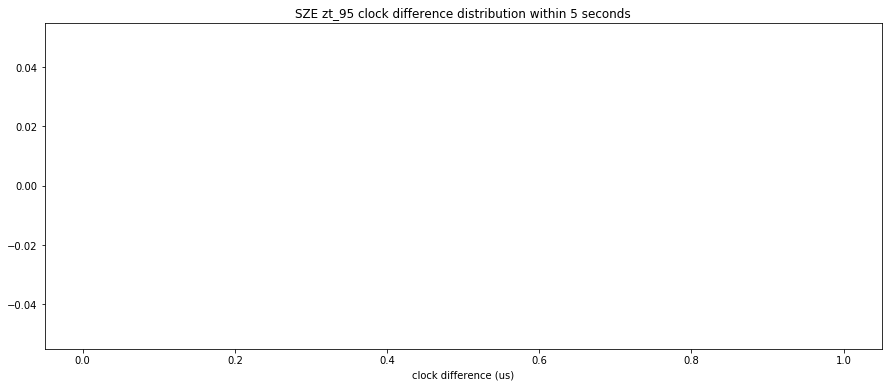

In [117]:
# display(orderLog[(orderLog['secid'] < 2000000) & (orderLog['colo_broker'] == 'zt_88') & (orderLog["updateType"] != 0)].groupby("order")['clockDif'].first())
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

print('20200327:')
fig, ax = plt.subplots(figsize=(15, 6))
display(orderLog[(orderLog['secid'] < 2000000) & (orderLog['colo_broker'] == 'zt_58') & (orderLog["updateType"] != 0) & (orderLog["date"] == 20200326) & (orderLog["isMsg"] == 0)& (orderLog["ars"] != 21)]['clockDif'].describe([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]).astype('int64'))
print('20200326:')
display(orderLog[(orderLog['secid'] < 2000000) & (orderLog['colo_broker'] == 'zt_58') & (orderLog["updateType"] != 0) & (orderLog["date"] == 20200324) & (orderLog["isMsg"] == 0)& (orderLog["ars"] != 21)]['clockDif'].describe([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]).astype('int64'))
data = orderLog[(orderLog['secid'] < 2000000) & (orderLog['colo_broker'] == 'zs_62') & (orderLog["updateType"] != 0) & (orderLog["date"] == 20200312) & (orderLog["isMsg"] == 0)& (orderLog["ars"] != 21)]['clockDif']
# data = data[data < 1000000]
sns.distplot(data, kde=False)
# we only care about distribution within 3 or 5 seconds
ax.set_xlabel("clock difference (us)")
plt.title("SZE zt_95 clock difference distribution within 5 seconds")
plt.show()
# print('median:')
# display(orderLog[(orderLog['secid'] >= 2000000) & (orderLog['colo_broker'] == 'zs_62') & (orderLog["updateType"] != 0)]['clockDif'])
# print('mean:')
# display(orderLog[(orderLog['secid'] >= 2000000) & (orderLog['colo_broker'] == 'zs_62') & (orderLog["updateType"] != 0)]['clockDif'].mean())

#### compare with previous result

In [48]:
### here we need exchangeTurnover data in part 1 Order Size

thisStartDate = '20200427'
thisEndDate = '20200508'

prevStartDate = '20200407'
prevEndDate = '20200424'

readPath = r'F:\orderLog\result\fillRate'
thisResult = pd.read_csv(os.path.join(readPath, 'fillRate1_%s_%s.csv'%(thisStartDate, thisEndDate)))
thisResult = thisResult.rename(columns={'% of orders': 'thisCountPerc', 'full fill': 'thisFullFill',
                                        'partial fill': 'thisPartialFill', 'no fill': 'thisNoFill',
                                        'fillPerc': 'thisFillPerc', 'immedFillPerc': 'thisImmedFillPerc'})


prevResult = pd.read_csv(os.path.join(readPath, 'fillRate1_%s_%s.csv'%(prevStartDate, prevEndDate)))
prevResult = prevResult.rename(columns={'% of orders': 'prevCountPerc', 'full fill': 'prevFullFill',
                                        'partial fill': 'prevPartialFill', 'no fill': 'prevNoFill',
                                        'fillPerc': 'prevFillPerc', 'immedFillPerc': 'prevImmedFillPerc'})

checkResult = pd.merge(thisResult, prevResult, how='left', on=['exchange', 'broker', "isMsg"], validate='one_to_one')
checkResult = checkResult.rename(columns={"# of orders_x": "this order", "# of orders_y": "prev order"})
checkResult['countPercDif'] = checkResult['thisCountPerc'] - checkResult['prevCountPerc']
checkResult['fullFillDif'] = checkResult['thisFullFill'] - checkResult['prevFullFill']
checkResult['partialFillDif'] = checkResult['thisPartialFill'] - checkResult['prevPartialFill']
checkResult['noFillDif'] = checkResult['thisNoFill'] - checkResult['prevNoFill']
checkResult['fillPercDif'] = checkResult['thisFillPerc'] - checkResult['prevFillPerc']
checkResult['immedFillPercDif'] = checkResult['thisImmedFillPerc'] - checkResult['prevImmedFillPerc']
re1 = checkResult[abs(checkResult['fullFillDif']) > 0.1]
re2 = checkResult[abs(checkResult['noFillDif']) > 0.1]
for col in ['prevFullFill', 'thisFullFill', 'fullFillDif',  'prevNoFill', 'thisNoFill', 'noFillDif']:
    re1[col] = re1[col].apply(lambda x: '%.0f%%'%(x*100))
    re2[col] = re2[col].apply(lambda x: '%.0f%%'%(x*100))

# display(checkResult[abs(checkResult['countPercDif']) > 0.1][['exchange', 'broker', 'isMsg', 'prevCountPerc', 'thisCountPerc', 'countPercDif']])
# display(re1[['exchange', 'broker', 'isMsg', 'prevFullFill', 'thisFullFill', 'fullFillDif']])
# display(checkResult[abs(checkResult['partialFillDif']) > 0.1][['exchange', 'broker', 'isMsg', 'prevPartialFill', 'thisPartialFill', 'partialFillDif']])
# display(re2[['exchange', 'broker', 'isMsg', 'prevNoFill', 'thisNoFill', 'noFillDif']])
# display(checkResult[abs(checkResult['fillPercDif']) > 0.1][['exchange', 'broker', 'prevFillPerc', 'thisFillPerc', 'fillPercDif']])
# display(checkResult[abs(checkResult['immedFillPercDif']) > 0.1][['exchange', 'broker', 'prevImmedFillPerc', 'thisImmedFillPerc', 'immedFillPercDif']])
a = checkResult[(abs(checkResult['fillPercDif']) > 0.1) | (abs(checkResult['immedFillPercDif']) > 0.1)].reset_index(drop=True)
# exchangeTurnover, check trade notional in each broker
a = pd.merge(a, exchangeTurnover.reset_index()[['exchange', 'broker', 'turnover']], how='left', on=['exchange', 'broker'], validate='many_to_one')
a["thisCount"] = a["this order"] * a["thisCountPerc"]
a["prevCount"] = a["prev order"] * a["prevCountPerc"]
a = a[['exchange', 'broker', 'isMsg', 'thisCount',"prevCount", 'prevFillPerc', 'thisFillPerc', 'fillPercDif',  'prevImmedFillPerc', 'thisImmedFillPerc', 'immedFillPercDif']]
for col in ['prevFillPerc', 'thisFillPerc', 'fillPercDif',  'prevImmedFillPerc', 'thisImmedFillPerc', 'immedFillPercDif']:
    a[col] = a[col].apply(lambda x: '%.0f%%'%(x*100))
a["thisCount"] = a["thisCount"].round(0).astype(int)
a["prevCount"] = a["prevCount"].round(0).astype(int)
display(a[(a["thisCount"] > 100) & (a["prevCount"] > 100)])
# pd.concat([re1[['exchange', 'broker', 'prevFullFill', 'thisFullFill', 'fullFillDif','prevNoFill', 'thisNoFill', 'noFillDif']], 
#            re2[['exchange', 'broker', 'prevFullFill', 'thisFullFill', 'fullFillDif','prevNoFill', 'thisNoFill', 'noFillDif']]]).drop_duplicates()

C:\Users\win\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\win\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,exchange,broker,isMsg,thisCount,prevCount,prevFillPerc,thisFillPerc,fillPercDif,prevImmedFillPerc,thisImmedFillPerc,immedFillPercDif
0,SSE,zt_58,1,211,546,68%,87%,19%,41%,71%,30%
1,SSE,zt_88,1,129,2205,64%,91%,27%,56%,62%,6%
2,SSE,zt_94,1,296,595,64%,82%,18%,53%,76%,23%
3,SSE,zt_95,1,675,1601,67%,88%,20%,49%,78%,28%
4,SSE,zt_96,1,2324,4263,85%,93%,8%,74%,85%,11%


In [46]:
### here we need exchangeTurnover data in part 1 Order Size

thisStartDate = '20200427'
thisEndDate = '20200508'

prevStartDate = '20200407'
prevEndDate = '20200424'

readPath = r'F:\orderLog\result\fillRate'
thisResult = pd.read_csv(os.path.join(readPath, 'fillRate2_%s_%s.csv'%(thisStartDate, thisEndDate)))
# thisResult = thisResult.drop(columns=['# of orders'])
thisResult = thisResult.rename(columns={'% of orders': 'thisCountPerc', 'full fill': 'thisFullFill',
                                        'partial fill': 'thisPartialFill', 'no fill': 'thisNoFill',
                                        'fillPerc': 'thisFillPerc', 'immedFillPerc': 'thisImmedFillPerc'})


prevResult = pd.read_csv(os.path.join(readPath, 'fillRate2_%s_%s.csv'%(prevStartDate, prevEndDate)))
# prevResult = prevResult.drop(columns=['# of orders'])
prevResult = prevResult.rename(columns={'% of orders': 'prevCountPerc', 'full fill': 'prevFullFill',
                                        'partial fill': 'prevPartialFill', 'no fill': 'prevNoFill',
                                        'fillPerc': 'prevFillPerc', 'immedFillPerc': 'prevImmedFillPerc'})

checkResult = pd.merge(thisResult, prevResult, how='left', on=['exchange', 'broker'], validate='one_to_one')
checkResult = checkResult.rename(columns={"# of orders_x": "this order", "# of orders_y": "prev order"})
checkResult['countPercDif'] = checkResult['thisCountPerc'] - checkResult['prevCountPerc']
checkResult['fullFillDif'] = checkResult['thisFullFill'] - checkResult['prevFullFill']
checkResult['partialFillDif'] = checkResult['thisPartialFill'] - checkResult['prevPartialFill']
checkResult['noFillDif'] = checkResult['thisNoFill'] - checkResult['prevNoFill']
checkResult['fillPercDif'] = checkResult['thisFillPerc'] - checkResult['prevFillPerc']
checkResult['immedFillPercDif'] = checkResult['thisImmedFillPerc'] - checkResult['prevImmedFillPerc']
re1 = checkResult[abs(checkResult['fullFillDif']) > 0.1]
re2 = checkResult[abs(checkResult['noFillDif']) > 0.1]
for col in ['prevFullFill', 'thisFullFill', 'fullFillDif',  'prevNoFill', 'thisNoFill', 'noFillDif']:
    re1[col] = re1[col].apply(lambda x: '%.0f%%'%(x*100))
    re2[col] = re2[col].apply(lambda x: '%.0f%%'%(x*100))

# display(checkResult[abs(checkResult['countPercDif']) > 0.1][['exchange', 'broker', 'prevCountPerc', 'thisCountPerc', 'countPercDif']])
# display(re1[['exchange', 'broker', 'prevFullFill', 'thisFullFill', 'fullFillDif']])
# display(checkResult[abs(checkResult['partialFillDif']) > 0.1][['exchange', 'broker', 'prevPartialFill', 'thisPartialFill', 'partialFillDif']])
# display(re2[['exchange', 'broker', 'prevNoFill', 'thisNoFill', 'noFillDif']])
# display(checkResult[abs(checkResult['fillPercDif']) > 0.1][['exchange', 'broker', 'prevFillPerc', 'thisFillPerc', 'fillPercDif']])
# display(checkResult[abs(checkResult['immedFillPercDif']) > 0.1][['exchange', 'broker', 'prevImmedFillPerc', 'thisImmedFillPerc', 'immedFillPercDif']])
a = checkResult[(abs(checkResult['fillPercDif']) > 0.1) | (abs(checkResult['immedFillPercDif']) > 0.1)].reset_index(drop=True)
# exchangeTurnover, check trade notional in each broker
a = pd.merge(a, exchangeTurnover.reset_index()[['exchange', 'broker', 'turnover']], how='left', on=['exchange', 'broker'], validate='one_to_one')
a["thisCount"] = a["this order"] * a["thisCountPerc"]
a["prevCount"] = a["prev order"] * a["prevCountPerc"]
a["thisCount"] = a["thisCount"].astype(int)
a["prevCount"] = a["prevCount"].astype(int)  
a = a[['exchange', 'broker', 'thisCount','prevCount', 'prevFillPerc', 'thisFillPerc', 'fillPercDif',  'prevImmedFillPerc', 'thisImmedFillPerc', 'immedFillPercDif']]
for col in ['prevFillPerc', 'thisFillPerc', 'fillPercDif',  'prevImmedFillPerc', 'thisImmedFillPerc', 'immedFillPercDif']:
    a[col] = a[col].apply(lambda x: '%.0f%%'%(x*100))
a["thisCount"] = a["thisCount"].round(0).astype(int)
a["prevCount"] = a["prevCount"].round(0).astype(int)
display(a)
# pd.concat([re1[['exchange', 'broker', 'prevFullFill', 'thisFullFill', 'fullFillDif','prevNoFill', 'thisNoFill', 'noFillDif']], 
#            re2[['exchange', 'broker', 'prevFullFill', 'thisFullFill', 'fullFillDif','prevNoFill', 'thisNoFill', 'noFillDif']]]).drop_duplicates()

,exchange,broker,thisCount,prevCount,prevFillPerc,thisFillPerc,fillPercDif,prevImmedFillPerc,thisImmedFillPerc,immedFillPercDif
